# PROJECT BRIEF
Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crimes reported in the city. Being effective involves knowing crime patterns and where they are likely to occur. It also involves equipping the Police Department appropriately. They have recruited you to conduct full data analytics and uncover insights from the data that can be used to effectively prepare for and respond to crimes. They are interested in gleaning any insights that can help them determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes

# TASK

Conduct a complete data analytics study and from your analytics, advise the Chicago PD accordingly.

# CHICAGO
“Chicago Not in Chicago”. A drive across Chicago’s lively immigrant neighbourhoods is a trip around the world: the cultures of virtually every country can be found in food stores, restaurants, clothing shops, music and video dealers, places of worship, and street-corner conversations. 

However, the rate in crime rate has brought about the analysis of Crime rate in Chicago, this crime data will give insight, and these insights will be used to advise the chicago PD accordingly.

# The work flow of this notebook is as follows:

   1. Importing the required library
   2. Loading the dataset to pandas dataframe
   3. Data exploration and cleaning
   4. Extracting insight in the data
   
   5. Conclusion
  
   6. Advise the Chicago PD using insight from the data.

# Importing the required Library

In [1]:
import pandas as pd #preprocessing and dataframe manipulation
import numpy as np  #matrix manipulation
import seaborn as sns #data visualization
sns.set_style('darkgrid') #setting style from sns
import matplotlib.pyplot as plt #data visualization
from dateutil.parser import parse #parse date and time
import plotly.subplots as px #plot multiple plot
from geopy.geocoders import Nominatim #geocoding & working with geospatial data
import geopandas as gpd #working with geospatial data
import geopy#working with coordinates
from IPython.display import IFrame#creating html components to display map
from geopy.geocoders import Nominatim#geocoding & working with geospatial data
import folium#working with geospatial visualization
from geopy.extra.rate_limiter import RateLimiter#
from folium import plugins #
from folium.plugins import MarkerCluster, FastMarkerCluster#cluster point on map.
import holidays #getting holidays period
import calendar #getting calender 
import warnings #ignore any warnings 
warnings.filterwarnings('ignore')


# Loading the dataset to Pandas

In [2]:
path = 'C:/Users/HP/Documents/workspace/Untitled Folder/crime_data_Proj1.csv'
data = pd.read_csv(path)

**Previewing the data frame.**

In [3]:
data

Unnamed: 0        ID Case Number                    Date  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   
...             ...       ...         ...                     ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   

                        Block  IUCR       Primary Type  \
0        085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  143C  WEAPONS VIOLATION   
2           062XX N TRIPP AVE  0610           BURGLARY   
3          0000X N KEELER AVE  0560            ASSAULT   
4         016XX W HARRISON ST  051A            ASSAULT   
...                       ...   ...                ...   
2278721      006XX N CLARK ST  0560            ASSAULT   
2278722       052XX W LAKE ST  0460            BATTERY   
2278723  007XX E OAKWOOD BLVD  0560            ASSAULT   
2278724       002XX W ERIE ST  1360  CRIMINAL TRESPASS   
2278725   016XX N ROCKWELL ST  1811          NARCOTICS   

                          Description                    Location Description  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2278721                        SIMPLE                       CONVENIENCE STORE   
2278722                        SIMPLE                               RESIDENCE   
2278723                        SIMPLE                               APARTMENT   
2278724                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2278725  POSS: CANNABIS 30GMS OR LESS                                  STREET   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ...  10.0            46.0        14     1196638.0   
1          True  ...   8.0            47.0        15     1184499.0   
2          True  ...  39.0            12.0        05     1146911.0   
3         False  ...  28.0            26.0       08A     1148388.0   
4         False  ...  27.0            28.0       04A     1165430.0   
...         ...  ...   ...             ...       ...           ...   
2278721    True  ...  42.0             8.0       08A     1175423.0   
2278722   False  ...   NaN             NaN       08B     1141137.0   
2278723   False  ...   4.0            38.0       08A     1181989.0   
2278724   False  ...  42.0             8.0        26     1174469.0   
2278725    True  ...   1.0            24.0        18     1158782.0   

         Y Coordinate  Year              Updated On   Latitude  Longitude  \
0           1848800.0  2008  02/28/2018 03:56:25 PM  41.739980 -87.555120   
1           1843935.0  2018  08/07/2018 04:02:59 PM  41.726922 -87.599747   
2           1941022.0  2007  02/28/2018 03:56:25 PM  41.994138 -87.734959   
3           1899882.0  2018  07/30/2018 03:52:24 PM  41.881217 -87.730590   
4           1897441.0  2021  07/18/2021 04:56:02 PM  41.874174 -87.668082   
...               ...   ...                     ...        ...        ...   
2278721     1904617.0  2016  02/10/2018 03:50:01 PM  41.893647 -87.631177   
2278722     1902008.0  2001  08/17/2015 03:03:40 PM  

**From the preview above, we can see that we have about 2278726 rows of data with 23 columns in our data frame.**

# Checking the data type of features in the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

**Loking at the data type above, we can see the different data types in the data as this will aide us during data wrangling to convert the required dtype that suits the feature in the data.**

# Checking the Columns in our Data

In [5]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

**There are 23 Columns in our data points. However, i made a dictionary to better understand what each columns signifies as we go on this journey:**

- **Unnamed: numeric order of the data frame**
    
- **ID: ID associated with the crime.**
 
- **Case Number: The case number associated with the crime.**

- **Date: listed date of crime.**

- **Block: block where crime occured.**

- **IUCR: four digit Illinois Uniform Crime Reporting (IUCR) codes.**

- **Primary Type: Type of crime.**

- **Description: Short description of the type of crime.**

- **Location description: Description of where crime occured.**

- **Arrest: boolean value (T/F) of whether or not an arrest was made.**

- **Domestic: boolean value (T/F) of whether or not crime was domestic.**

- **Beat: Indicates the beat where the incident occurred.**

- **District: Indicates police district where incident occurred.**

- **Ward: The city council district where the incident occurred.**

- **Community Area: numeric value indicating area in community where crime occured.**

-  **FBI Code: numeric code indicating FBI crime categorization.**

-  **X & Y Coordinate: exact location where crime occured.**

-  **Year: Year crime occured.**

-  **Updated on: The date of last update of the record.**

-  **Latitude & Longitude: latitude and longitude information of crime.**

-  **Location: Latitude & Longitude saved together.**

# Describing and Summarizing the data

In [6]:
pd.options.display.float_format= '{:.2f}'.format
data.describe(percentiles=[.01, .05, .1, .25, .5, .9, .95, .99])

Unnamed: 0          ID       Beat   District       Ward  \
count  2278726.00  2278726.00 2278726.00 2278714.00 2094031.00   
mean   1139362.50  6882067.87    1186.44      11.29      22.73   
std     657811.68  3419167.96     702.68       6.95      13.83   
min          0.00      637.00     111.00       1.00       1.00   
1%       22787.25  1400572.75     113.00       1.00       1.00   
5%      113936.25  1782904.25     215.00       2.00       2.00   
10%     227872.50  2258430.00     323.00       3.00       4.00   
25%     569681.25  3716076.25     621.00       6.00      10.00   
50%    1139362.50  6885990.00    1034.00      10.00      23.00   
90%    2050852.50 11629782.00    2234.00      22.00      42.00   
95%    2164788.75 12194438.25    2512.00      25.00      46.00   
99%    2255937.75 12661290.50    2533.00      25.00      50.00   
max    2278725.00 12781989.00    2535.00      31.00      50.00   

       Community Area  X Coordinate  Y Coordinate       Year   Latitude  \
count      2094459.00    2254741.00    2254741.00 2278726.00 2254741.00   
mean            37.52    1164569.04    1885747.47    2009.64      41.84   
std             21.53      16739.55      32098.55       6.02       0.09   
min              0.00          0.00          0.00    2001.00      36.62   
1%               1.00    1127224.00    1823521.00    2001.00      41.67   
5%               5.00    1138390.00    1834613.00    2001.00      41.70   
10%              8.00    1142811.00    1845935.00    2002.00      41.73   
25%             23.00    1152948.00    1859053.00    2004.00      41.77   
50%             32.00    1166060.00    1890673.00    2009.00      41.86   
90%             69.00    1183729.00    1926796.00    2019.00      41.95   
95%             71.00    1191213.00    1934997.00    2020.00      41.98   
99%             76.00    1198312.00    1947451.00    2022.00      42.01   
max             77.00    1205119.00    1951622.00    2022.00      42.02   

       Longitude  
count 2254741.00  
mean      -87.67  
std         0.06  
min       -91.69  
1%        -87.81  
5%        -87.77  
10%       -87.75  
25%       -87.71  
50%       -87.67  
90%       -87.60  
95%       -87.57  
99%       -87.55  
max       -87.52

**The above shows the summary statistics of our data rounded to two significant figures.**

# Checking for duplicates in the data

In [7]:
data.duplicated().sum()

0

**There are no duplicates in the data point.**

# Checking for missing data

In [8]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

   **Lo0king at the data above, there are alot of missing data in our data point. There are alot of techniques required in   treating missing or messy data, but for the sake of this data we will be applying the following methods to clean our data:**

- **The missing points in 'Case Number', 'X & Y Coordinate', 'Latitude' & 'Longitude', 'Location', District are going to be dropped. This is due to the following facts:**


- **The exact case number can't just be filled with any case number as it might affect the insight gotten from this data. - Moreso, the exact location, X & Y Coordinate, Latitude & Longitude, 'District' are also going to be dropped as we can't exactly say this is where a certain type of crime happened.**


- **The 'Location Description' will be filled with OTHER as this is one of the uniques subset in the feature and it doesnt affect nor change the insight gotten from the data.**


- **The 'Ward' & 'Community Area' will be treated with their respective mean as the statistical summary showed that the mean in the data point and the 50% which is the median is not far off.**

# Treating the missing data

In [9]:
data['Location Description'].value_counts()

STREET                590957
RESIDENCE             384472
APARTMENT             253117
SIDEWALK              216276
OTHER                  81245
                       ...  
SEWER                      1
RIVER                      1
TRAILER                    1
CTA SUBWAY STATION         1
CHA PLAY LOT               1
Name: Location Description, Length: 198, dtype: int64

**We can see that filling the 'Location Description' with 'Other' which is a subset in the data wont change the quality of the data.**

In [10]:
df = data['Location Description'].fillna('OTHER', inplace=True)

In [11]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

**From the above, Location Description is treated.**

In [12]:
data.dropna(how= 'all', subset=['X Coordinate', 'Y Coordinate', 
                                'Latitude','Longitude',
                                'Location' ], inplace= True)

data

Unnamed: 0        ID Case Number                    Date  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   
...             ...       ...         ...                     ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   

                        Block  IUCR       Primary Type  \
0        085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  143C  WEAPONS VIOLATION   
2           062XX N TRIPP AVE  0610           BURGLARY   
3          0000X N KEELER AVE  0560            ASSAULT   
4         016XX W HARRISON ST  051A            ASSAULT   
...                       ...   ...                ...   
2278721      006XX N CLARK ST  0560            ASSAULT   
2278722       052XX W LAKE ST  0460            BATTERY   
2278723  007XX E OAKWOOD BLVD  0560            ASSAULT   
2278724       002XX W ERIE ST  1360  CRIMINAL TRESPASS   
2278725   016XX N ROCKWELL ST  1811          NARCOTICS   

                          Description                    Location Description  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2278721                        SIMPLE                       CONVENIENCE STORE   
2278722                        SIMPLE                               RESIDENCE   
2278723                        SIMPLE                               APARTMENT   
2278724                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2278725  POSS: CANNABIS 30GMS OR LESS                                  STREET   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ... 10.00           46.00        14    1196638.00   
1          True  ...  8.00           47.00        15    1184499.00   
2          True  ... 39.00           12.00        05    1146911.00   
3         False  ... 28.00           26.00       08A    1148388.00   
4         False  ... 27.00           28.00       04A    1165430.00   
...         ...  ...   ...             ...       ...           ...   
2278721    True  ... 42.00            8.00       08A    1175423.00   
2278722   False  ...   NaN             NaN       08B    1141137.00   
2278723   False  ...  4.00           38.00       08A    1181989.00   
2278724   False  ... 42.00            8.00        26    1174469.00   
2278725    True  ...  1.00           24.00        18    1158782.00   

         Y Coordinate  Year              Updated On  Latitude  Longitude  \
0          1848800.00  2008  02/28/2018 03:56:25 PM     41.74     -87.56   
1          1843935.00  2018  08/07/2018 04:02:59 PM     41.73     -87.60   
2          1941022.00  2007  02/28/2018 03:56:25 PM     41.99     -87.73   
3          1899882.00  2018  07/30/2018 03:52:24 PM     41.88     -87.73   
4          1897441.00  2021  07/18/2021 04:56:02 PM     41.87     -87.67   
...               ...   ...                     ...       ...        ...   
2278721    1904617.00  2016  02/10/2018 03:50:01 PM     41.89     -87.63   
2278722    1902008.00  2001  08/17/2015 03:03:40 PM     41.89

In [13]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    181939
Community Area          181546
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

**From the above, 'X Coordinate', 'Y Coordinate', 'Latitude','Longitude', 'Location' & Case Number  is treated.**

In [14]:
data.dropna(how= 'all', subset=['Case Number'], inplace= True)
data

Unnamed: 0        ID Case Number                    Date  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   
...             ...       ...         ...                     ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   

                        Block  IUCR       Primary Type  \
0        085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  143C  WEAPONS VIOLATION   
2           062XX N TRIPP AVE  0610           BURGLARY   
3          0000X N KEELER AVE  0560            ASSAULT   
4         016XX W HARRISON ST  051A            ASSAULT   
...                       ...   ...                ...   
2278721      006XX N CLARK ST  0560            ASSAULT   
2278722       052XX W LAKE ST  0460            BATTERY   
2278723  007XX E OAKWOOD BLVD  0560            ASSAULT   
2278724       002XX W ERIE ST  1360  CRIMINAL TRESPASS   
2278725   016XX N ROCKWELL ST  1811          NARCOTICS   

                          Description                    Location Description  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2278721                        SIMPLE                       CONVENIENCE STORE   
2278722                        SIMPLE                               RESIDENCE   
2278723                        SIMPLE                               APARTMENT   
2278724                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2278725  POSS: CANNABIS 30GMS OR LESS                                  STREET   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ... 10.00           46.00        14    1196638.00   
1          True  ...  8.00           47.00        15    1184499.00   
2          True  ... 39.00           12.00        05    1146911.00   
3         False  ... 28.00           26.00       08A    1148388.00   
4         False  ... 27.00           28.00       04A    1165430.00   
...         ...  ...   ...             ...       ...           ...   
2278721    True  ... 42.00            8.00       08A    1175423.00   
2278722   False  ...   NaN             NaN       08B    1141137.00   
2278723   False  ...  4.00           38.00       08A    1181989.00   
2278724   False  ... 42.00            8.00        26    1174469.00   
2278725    True  ...  1.00           24.00        18    1158782.00   

         Y Coordinate  Year              Updated On  Latitude  Longitude  \
0          1848800.00  2008  02/28/2018 03:56:25 PM     41.74     -87.56   
1          1843935.00  2018  08/07/2018 04:02:59 PM     41.73     -87.60   
2          1941022.00  2007  02/28/2018 03:56:25 PM     41.99     -87.73   
3          1899882.00  2018  07/30/2018 03:52:24 PM     41.88     -87.73   
4          1897441.00  2021  07/18/2021 04:56:02 PM     41.87     -87.67   
...               ...   ...                     ...       ...        ...   
2278721    1904617.00  2016  02/10/2018 03:50:01 PM     41.89     -87.63   
2278722    1902008.00  2001  08/17/2015 03:03:40 PM     41.89

In [15]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    181939
Community Area          181546
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

**From the above,  'Case Number' is treated.**

In [16]:
data['Ward'] = data['Ward'].fillna(data['Ward'].mean())
data

Unnamed: 0        ID Case Number                    Date  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   
...             ...       ...         ...                     ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   

                        Block  IUCR       Primary Type  \
0        085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  143C  WEAPONS VIOLATION   
2           062XX N TRIPP AVE  0610           BURGLARY   
3          0000X N KEELER AVE  0560            ASSAULT   
4         016XX W HARRISON ST  051A            ASSAULT   
...                       ...   ...                ...   
2278721      006XX N CLARK ST  0560            ASSAULT   
2278722       052XX W LAKE ST  0460            BATTERY   
2278723  007XX E OAKWOOD BLVD  0560            ASSAULT   
2278724       002XX W ERIE ST  1360  CRIMINAL TRESPASS   
2278725   016XX N ROCKWELL ST  1811          NARCOTICS   

                          Description                    Location Description  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2278721                        SIMPLE                       CONVENIENCE STORE   
2278722                        SIMPLE                               RESIDENCE   
2278723                        SIMPLE                               APARTMENT   
2278724                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2278725  POSS: CANNABIS 30GMS OR LESS                                  STREET   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ... 10.00           46.00        14    1196638.00   
1          True  ...  8.00           47.00        15    1184499.00   
2          True  ... 39.00           12.00        05    1146911.00   
3         False  ... 28.00           26.00       08A    1148388.00   
4         False  ... 27.00           28.00       04A    1165430.00   
...         ...  ...   ...             ...       ...           ...   
2278721    True  ... 42.00            8.00       08A    1175423.00   
2278722   False  ... 22.72             NaN       08B    1141137.00   
2278723   False  ...  4.00           38.00       08A    1181989.00   
2278724   False  ... 42.00            8.00        26    1174469.00   
2278725    True  ...  1.00           24.00        18    1158782.00   

         Y Coordinate  Year              Updated On  Latitude  Longitude  \
0          1848800.00  2008  02/28/2018 03:56:25 PM     41.74     -87.56   
1          1843935.00  2018  08/07/2018 04:02:59 PM     41.73     -87.60   
2          1941022.00  2007  02/28/2018 03:56:25 PM     41.99     -87.73   
3          1899882.00  2018  07/30/2018 03:52:24 PM     41.88     -87.73   
4          1897441.00  2021  07/18/2021 04:56:02 PM     41.87     -87.67   
...               ...   ...                     ...       ...        ...   
2278721    1904617.00  2016  02/10/2018 03:50:01 PM     41.89     -87.63   
2278722    1902008.00  2001  08/17/2015 03:03:40 PM     41.89

In [17]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                         0
Community Area          181546
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

**From the above, 'Ward' is treated.**

In [18]:
data['Community Area'] = data['Community Area'].fillna(data['Community Area'].mean())
data

Unnamed: 0        ID Case Number                    Date  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   
...             ...       ...         ...                     ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   

                        Block  IUCR       Primary Type  \
0        085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  143C  WEAPONS VIOLATION   
2           062XX N TRIPP AVE  0610           BURGLARY   
3          0000X N KEELER AVE  0560            ASSAULT   
4         016XX W HARRISON ST  051A            ASSAULT   
...                       ...   ...                ...   
2278721      006XX N CLARK ST  0560            ASSAULT   
2278722       052XX W LAKE ST  0460            BATTERY   
2278723  007XX E OAKWOOD BLVD  0560            ASSAULT   
2278724       002XX W ERIE ST  1360  CRIMINAL TRESPASS   
2278725   016XX N ROCKWELL ST  1811          NARCOTICS   

                          Description                    Location Description  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2278721                        SIMPLE                       CONVENIENCE STORE   
2278722                        SIMPLE                               RESIDENCE   
2278723                        SIMPLE                               APARTMENT   
2278724                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2278725  POSS: CANNABIS 30GMS OR LESS                                  STREET   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ... 10.00           46.00        14    1196638.00   
1          True  ...  8.00           47.00        15    1184499.00   
2          True  ... 39.00           12.00        05    1146911.00   
3         False  ... 28.00           26.00       08A    1148388.00   
4         False  ... 27.00           28.00       04A    1165430.00   
...         ...  ...   ...             ...       ...           ...   
2278721    True  ... 42.00            8.00       08A    1175423.00   
2278722   False  ... 22.72           37.54       08B    1141137.00   
2278723   False  ...  4.00           38.00       08A    1181989.00   
2278724   False  ... 42.00            8.00        26    1174469.00   
2278725    True  ...  1.00           24.00        18    1158782.00   

         Y Coordinate  Year              Updated On  Latitude  Longitude  \
0          1848800.00  2008  02/28/2018 03:56:25 PM     41.74     -87.56   
1          1843935.00  2018  08/07/2018 04:02:59 PM     41.73     -87.60   
2          1941022.00  2007  02/28/2018 03:56:25 PM     41.99     -87.73   
3          1899882.00  2018  07/30/2018 03:52:24 PM     41.88     -87.73   
4          1897441.00  2021  07/18/2021 04:56:02 PM     41.87     -87.67   
...               ...   ...                     ...       ...        ...   
2278721    1904617.00  2016  02/10/2018 03:50:01 PM     41.89     -87.63   
2278722    1902008.00  2001  08/17/2015 03:03:40 PM     41.89

In [19]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     0
Arrest                   0
Domestic                 0
Beat                     0
District                12
Ward                     0
Community Area           0
FBI Code                 0
X Coordinate             0
Y Coordinate             0
Year                     0
Updated On               0
Latitude                 0
Longitude                0
Location                 0
dtype: int64

**From the above, 'Community Area' is treated.**

In [20]:
data.dropna(how= 'all', subset=['District'], inplace= True)
data

Unnamed: 0        ID Case Number                    Date  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   
...             ...       ...         ...                     ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   

                        Block  IUCR       Primary Type  \
0        085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  143C  WEAPONS VIOLATION   
2           062XX N TRIPP AVE  0610           BURGLARY   
3          0000X N KEELER AVE  0560            ASSAULT   
4         016XX W HARRISON ST  051A            ASSAULT   
...                       ...   ...                ...   
2278721      006XX N CLARK ST  0560            ASSAULT   
2278722       052XX W LAKE ST  0460            BATTERY   
2278723  007XX E OAKWOOD BLVD  0560            ASSAULT   
2278724       002XX W ERIE ST  1360  CRIMINAL TRESPASS   
2278725   016XX N ROCKWELL ST  1811          NARCOTICS   

                          Description                    Location Description  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2278721                        SIMPLE                       CONVENIENCE STORE   
2278722                        SIMPLE                               RESIDENCE   
2278723                        SIMPLE                               APARTMENT   
2278724                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2278725  POSS: CANNABIS 30GMS OR LESS                                  STREET   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ... 10.00           46.00        14    1196638.00   
1          True  ...  8.00           47.00        15    1184499.00   
2          True  ... 39.00           12.00        05    1146911.00   
3         False  ... 28.00           26.00       08A    1148388.00   
4         False  ... 27.00           28.00       04A    1165430.00   
...         ...  ...   ...             ...       ...           ...   
2278721    True  ... 42.00            8.00       08A    1175423.00   
2278722   False  ... 22.72           37.54       08B    1141137.00   
2278723   False  ...  4.00           38.00       08A    1181989.00   
2278724   False  ... 42.00            8.00        26    1174469.00   
2278725    True  ...  1.00           24.00        18    1158782.00   

         Y Coordinate  Year              Updated On  Latitude  Longitude  \
0          1848800.00  2008  02/28/2018 03:56:25 PM     41.74     -87.56   
1          1843935.00  2018  08/07/2018 04:02:59 PM     41.73     -87.60   
2          1941022.00  2007  02/28/2018 03:56:25 PM     41.99     -87.73   
3          1899882.00  2018  07/30/2018 03:52:24 PM     41.88     -87.73   
4          1897441.00  2021  07/18/2021 04:56:02 PM     41.87     -87.67   
...               ...   ...                     ...       ...        ...   
2278721    1904617.00  2016  02/10/2018 03:50:01 PM     41.89     -87.63   
2278722    1902008.00  2001  08/17/2015 03:03:40 PM     41.89

In [21]:
data.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

**Now we have a clean data set after perfoming the above outlined steps.** 

# Generating More Columns to further help in analyzing our data.

In [22]:
from dateutil.parser import parse
from datetime import datetime
tCol = data['Date']

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<5:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>6:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

data['month'] = monthList
data['day'] = dayList
data['period']= periodList
data.head()



2254729 2254729 2254729


Unnamed: 0        ID Case Number                    Date  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR       Primary Type               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  ...  X Coordinate  \
0                                  STREET   False  ...    1196638.00   
1                               POOL ROOM    True  ...    1184499.00   
2                               RESIDENCE    True  ...    1146911.00   
3            NURSING HOME/RETIREMENT HOME   False  ...    1148388.00   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False  ...    1165430.00   

   Y Coordinate  Year              Updated On  Latitude Longitude  \
0    1848800.00  2008  02/28/2018 03:56:25 PM     41.74    -87.56   
1    1843935.00  2018  08/07/2018 04:02:59 PM     41.73    -87.60   
2    1941022.00  2007  02/28/2018 03:56:25 PM     41.99    -87.73   
3    1899882.00  2018  07/30/2018 03:52:24 PM     41.88    -87.73   
4    1897441.00  2021  07/18/2021 04:56:02 PM     41.87    -87.67   

                        Location  month   day     period  
0  (41.739979622, -87.555120042)    Jul  Sat   Afternoon  
1  (41.726922145, -87.599746995)    Jul  Tue     Morning  
2  (41.994137622, -87.734959049)    Apr  Fri     Morning  
3  (41.881217483, -87.730589961)    Jul  Mon     Morning  
4  (41.874173691, -87.668082118)    Jul  Sun     Morning  

[5 rows x 26 columns]

**From the date column, new features were genrated as follows:**
- **'month'**
- **'day'**
- **'Period'**

- **Month - the month the crime happened.**
- **Day - the day the day happened.**
- **Period - the period the crime happened.** 

**This gives us 26 columns in our data.**

In [23]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'month', 'day', 'period'],
      dtype='object')

In [24]:
col_name = 'month'
  
# find the index no
index_no1 = data.columns.get_loc(col_name)
print(f"the month column is index number {index_no1}")

col_name ='day'
  
# find the index no
index_no2 = data.columns.get_loc(col_name)
print(f"the day column is index number {index_no2}" )

col_name = 'period'

index_no3 = data.columns.get_loc(col_name)
print(f"the period column is index number {index_no3}" )

col_name ='Date'
  
# find the index no
index_no4 = data.columns.get_loc(col_name)
print(f"the Date column is index number {index_no4}")

the month column is index number 23
the day column is index number 24
the period column is index number 25
the Date column is index number 3


**Getting the index position of the new colums in our data to position them close to the date column.**

In [25]:
col_name='month'
first_col = data.pop(col_name)

col_name1 = 'day'
first_col1 = data.pop(col_name1)

col_name2 = 'period'
first_col2 = data.pop(col_name2)

data.insert(4, col_name, first_col)
data.insert(5, col_name1, first_col1)
data.insert(6, col_name2, first_col2)

**Using the pop and insert function to position the new columns in the data.**

In [26]:
data

Unnamed: 0        ID Case Number                    Date month   day  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   Jul  Sat    
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   Jul  Tue    
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   Apr  Fri    
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   Jul  Mon    
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   Jul  Sun    
...             ...       ...         ...                     ...   ...   ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   Oct  Fri    
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   Sep  Tue    
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   May  Wed    
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   Oct  Wed    
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   Jun  Wed    

            period                 Block  IUCR       Primary Type  ...  Ward  \
0        Afternoon  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE  ... 10.00   
1          Morning     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  ...  8.00   
2          Morning     062XX N TRIPP AVE  0610           BURGLARY  ... 39.00   
3          Morning    0000X N KEELER AVE  0560            ASSAULT  ... 28.00   
4          Morning   016XX W HARRISON ST  051A            ASSAULT  ... 27.00   
...            ...                   ...   ...                ...  ...   ...   
2278721  Afternoon      006XX N CLARK ST  0560            ASSAULT  ... 42.00   
2278722      Night       052XX W LAKE ST  0460            BATTERY  ... 22.72   
2278723      Night  007XX E OAKWOOD BLVD  0560            ASSAULT  ...  4.00   
2278724      Night       002XX W ERIE ST  1360  CRIMINAL TRESPASS  ... 42.00   
2278725      Night   016XX N ROCKWELL ST  1811          NARCOTICS  ...  1.00   

        Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0                46.00        14    1196638.00    1848800.00  2008   
1                47.00        15    1184499.00    1843935.00  2018   
2                12.00        05    1146911.00    1941022.00  2007   
3                26.00       08A    1148388.00    1899882.00  2018   
4                28.00       04A    1165430.00    1897441.00  2021   
...                ...       ...           ...           ...   ...   
2278721           8.00       08A    1175423.00    1904617.00  2016   
2278722          37.54       08B    1141137.00    1902008.00  2001   
2278723          38.00       08A    1181989.00    1878827.00  2006   
2278724           8.00        26    1174469.00    1904732.00  2017   
2278725          24.00        18    1158782.00    1910845.00  2004   

                     Updated On  Latitude Longitude  \
0        02/28/2018 03:56:25 PM     41.74    -87.56   
1        08/07/2018 04:02:59 PM     41.73    -87.60   
2        02/28/2018 03:56:25 PM     41.99    -87.73   
3        07/30/2018 03:52:24 PM     41.88    -87.73   
4        07/18/2021 04:56:02 PM     41.87    -87.67   
...                         ...       ...       ...   
2278721  02/10/2018 03:50:01 PM     41.89    -87.63   
2278722  08/17/2015 03:03:40 PM     41.89    -87.76   
2278723  02/28/2018 03:56:25 PM     41.82    -87.61   
2278724  02/10/2018 03:50:01 PM     41.89    -87.63   
2278725  02/28/2018 03:56:25 PM     41.91    -87.69   

                              Location  
0        (41.739979622, -87.555120042)  
1        (41.726922145, -87.599746995)  
2        (41.994137622, -87.734959049)  
3        (41.881217483, -87.730589961)  
4        (41.874173691, -87.668082118)  
...                                ...  
2278721  (41.893646656, -87.631177143)  
2278722  (41.887188151, -87.757163155)  
2278723   (41.82272748, -87.607863136)  
2278724  (41.893983593, -87.634677382)  
2278725   (41.91109424, -87.692122762)  

[2254729 rows x 26 columns]

In [27]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'month', 'day', 'period',
       'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

# DATA EXPLORATORY ANALYSIS

In [28]:
data.groupby('Year')['Year'].count()

Year
2001    145384
2002    140974
2003    141505
2004    140173
2005    134647
2006    133969
2007    130349
2008    125789
2009    116366
2010    110963
2011    105558
2012    100637
2013     91548
2014     82137
2015     77312
2016     80473
2017     79568
2018     79464
2019     77530
2020     62587
2021     61045
2022     36751
Name: Year, dtype: int64

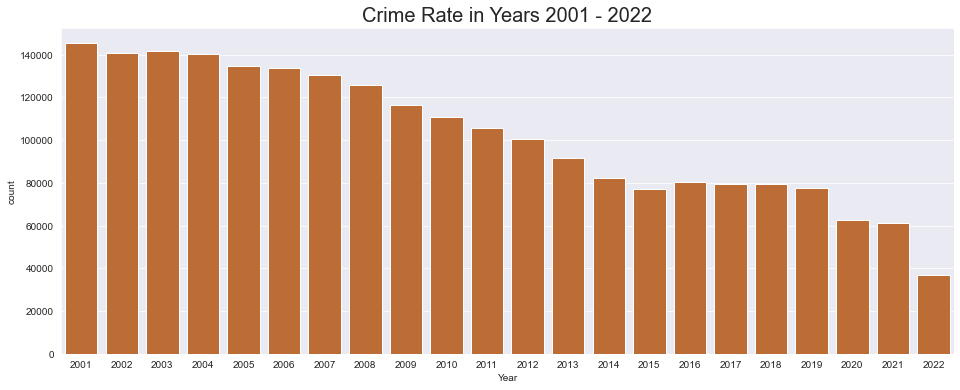

In [29]:
fig= plt.figure(figsize=(16,6))
sns.countplot(data= data, x='Year',color='#D2691E')
plt.title('Crime Rate in Years 2001 - 2022', fontsize= 20)
plt.show()

**The above plot shows the rate of crime in Chicago from 2001 - 2022.**

- **From the above plot, crime was highest in the year 2001, 2002, 2003, 2004 respectively.**
- **Crime from the above plot had a fall from the year 2005 downwards.**
- **Crime was lowest from the year 2020, 2021 and 2022. we can say that there was a drastic reduction in crime rate from 2001 to 2022.**
- **_The question remains why was crime at its peak in year 2001 - 2004?_**

 **We will keep that in mind as we move on.**

In [30]:
data.groupby('Primary Type')['Primary Type'].count().sort_values(ascending= False)

Primary Type
THEFT                                473441
BATTERY                              416910
CRIMINAL DAMAGE                      258650
NARCOTICS                            219441
ASSAULT                              147048
OTHER OFFENSE                        140514
BURGLARY                             124679
MOTOR VEHICLE THEFT                  104919
DECEPTIVE PRACTICE                    94510
ROBBERY                               85273
CRIMINAL TRESPASS                     63201
WEAPONS VIOLATION                     30072
PROSTITUTION                          20564
PUBLIC PEACE VIOLATION                15434
OFFENSE INVOLVING CHILDREN            15266
SEX OFFENSE                            8259
CRIM SEXUAL ASSAULT                    7904
INTERFERENCE WITH PUBLIC OFFICER       5477
LIQUOR LAW VIOLATION                   4420
GAMBLING                               4308
ARSON                                  3865
HOMICIDE                               3597
KIDNAPPING         

Text(0.5, 1.0, 'Top 20 Type of Crimes In Chicago: 2001 - 2022')

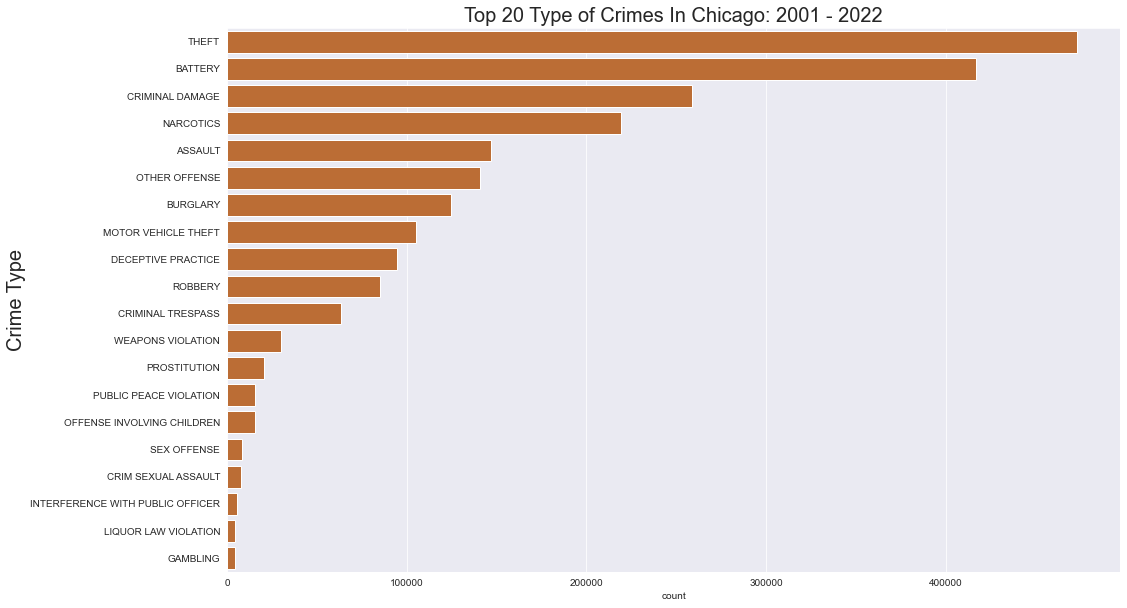

In [31]:
fig= plt.figure(figsize=(16,10))
sns.countplot(y ='Primary Type', data= data, color='#D2691E',
             order=data['Primary Type'].value_counts().iloc[:20].index)
plt.ylabel('Crime Type', fontsize= 20)
plt.title('Top 20 Type of Crimes In Chicago: 2001 - 2022', fontsize= 20)
#plt.show()

**The above plot shows the top 20 crimes in Chicago from the year 2001 - 2022, where THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, ASSAULT ranked higehst respectively.**

**However, there are other crime types in Chicago.**


In [32]:
data.groupby('Arrest')['Arrest'].count().sort_values()

Arrest
True      597877
False    1656852
Name: Arrest, dtype: int64

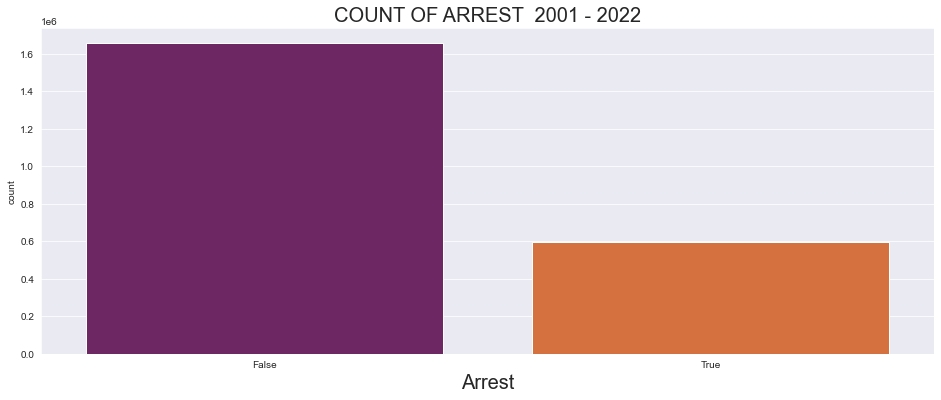

In [33]:
fig= plt.figure(figsize=(16,6))
total = int(len(data))
ax = sns.countplot(data= data, x='Arrest', palette='inferno')
plt.xlabel('Arrest', fontsize= 20)
plt.title('COUNT OF ARREST  2001 - 2022', fontsize= 20)

plt.show()

**The above plot shows the arrest made(TRUE) as against arrest not made(False).** 

- **Looking at the plot, we will agree that the arrest not made is more than the arrest made over time, does it mean that anyone can get away with crime in the city of Chicago?**

- **Does it mean that the police lack the capacity to make more arrest and close more crimes.**

In [34]:
hr = data.groupby('Location Description')['Location Description'].count().sort_values(ascending = False)
hr.head(20)

Location Description
STREET                            586596
RESIDENCE                         378125
APARTMENT                         250299
SIDEWALK                          214965
OTHER                              81730
PARKING LOT/GARAGE(NON.RESID.)     60602
ALLEY                              50322
SCHOOL, PUBLIC, BUILDING           43448
SMALL RETAIL STORE                 42538
RESIDENCE-GARAGE                   40306
RESIDENCE PORCH/HALLWAY            36938
RESTAURANT                         36815
VEHICLE NON-COMMERCIAL             35831
GROCERY FOOD STORE                 28890
DEPARTMENT STORE                   28423
GAS STATION                        25089
RESIDENTIAL YARD (FRONT/BACK)      22468
COMMERCIAL / BUSINESS OFFICE       16991
PARK PROPERTY                      16969
CHA PARKING LOT/GROUNDS            16786
Name: Location Description, dtype: int64

**The above distribution shows the top 20 locations where crimes happen in Chicago. The STREET, RESIDENCE, APARTMENT, SIDEWALK, & OTHER ranked higest where crime take place.**

Text(0.5, 1.0, 'Top 20 Crime Location In Chicago: 2001 - 2022')

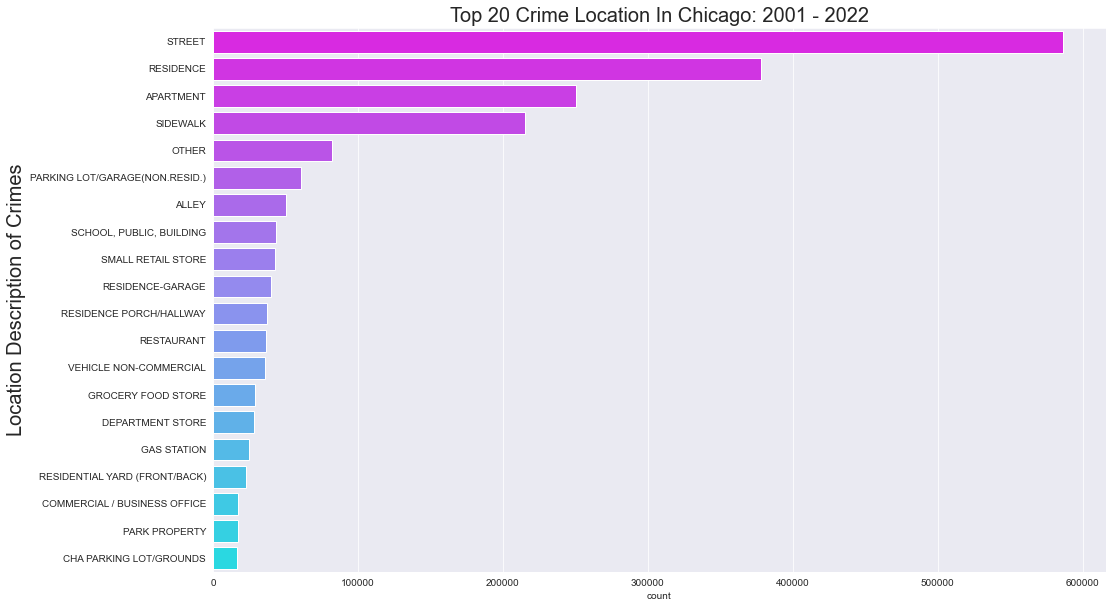

In [35]:
fig= plt.figure(figsize=(16,10))
sns.countplot(y ='Location Description', data= data, palette='cool_r',
             order=data['Location Description'].value_counts().iloc[:20].index)
plt.ylabel('Location Description of Crimes', fontsize= 20)
plt.title('Top 20 Crime Location In Chicago: 2001 - 2022', fontsize= 20)


**From the above plot, crime happens mostly on the street, residence, Apartment, Sidewalk, and others.**

# A SCATTER PLOT OF THE GEOGRAPHICAL LOCATION AND DISTRICTS ACROSS CHICAGO

Text(0.5, 1.0, 'A SCATTER PLOT OF GEOGRAPHICAL LOCATION & DISTRICT OF CHICAGO')

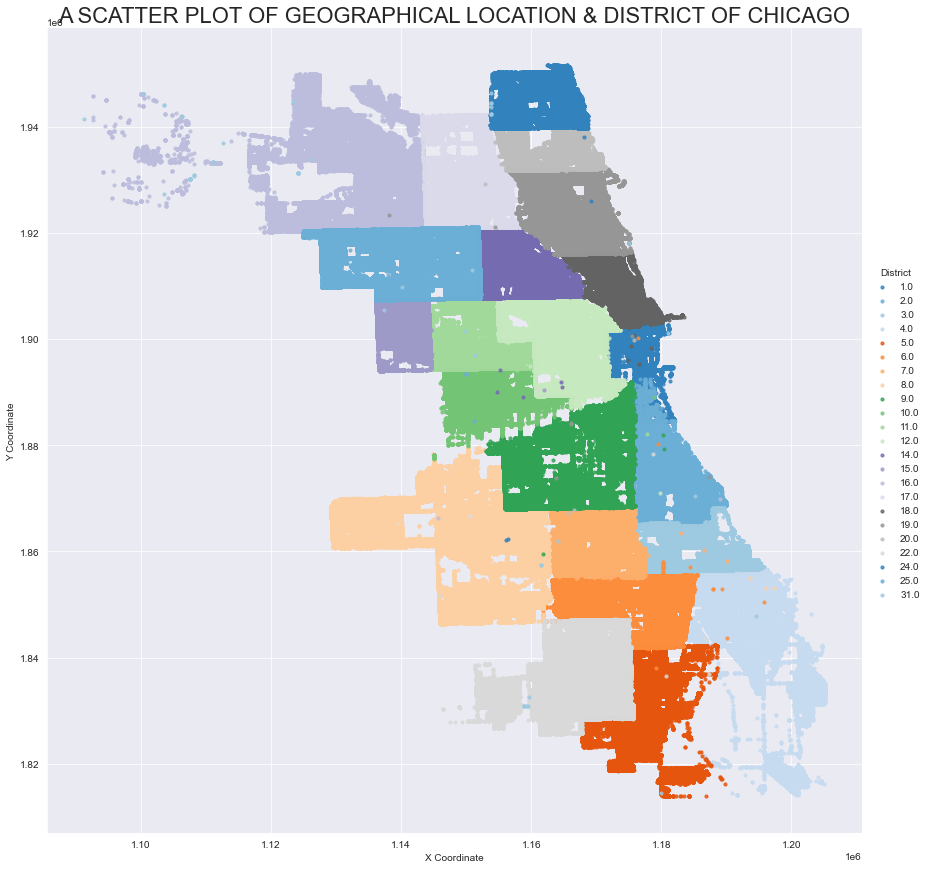

In [36]:
data = data.loc[(data['X Coordinate']!=0)]

sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=data[:],
          fit_reg=False,
          hue= 'District',
          palette= 'tab20c',
          height=12,
          ci=2,
          scatter_kws={"marker":
                       "D",
                       "s": 10})
ax = plt.gca()

ax.set_title("A SCATTER PLOT OF GEOGRAPHICAL LOCATION & DISTRICT OF CHICAGO", fontsize= 22)

- **The above scatter plot shows the geographical location of district across chicago.**

- **There are areas with spaces and this is attributed to the unavailaility of human activities in those areas. Those areas can be attirbuted to be the seaport, airport etc.**

- **There is an image below gotten from the web to compare this scatter plot geographical location across the city of Chicago.**

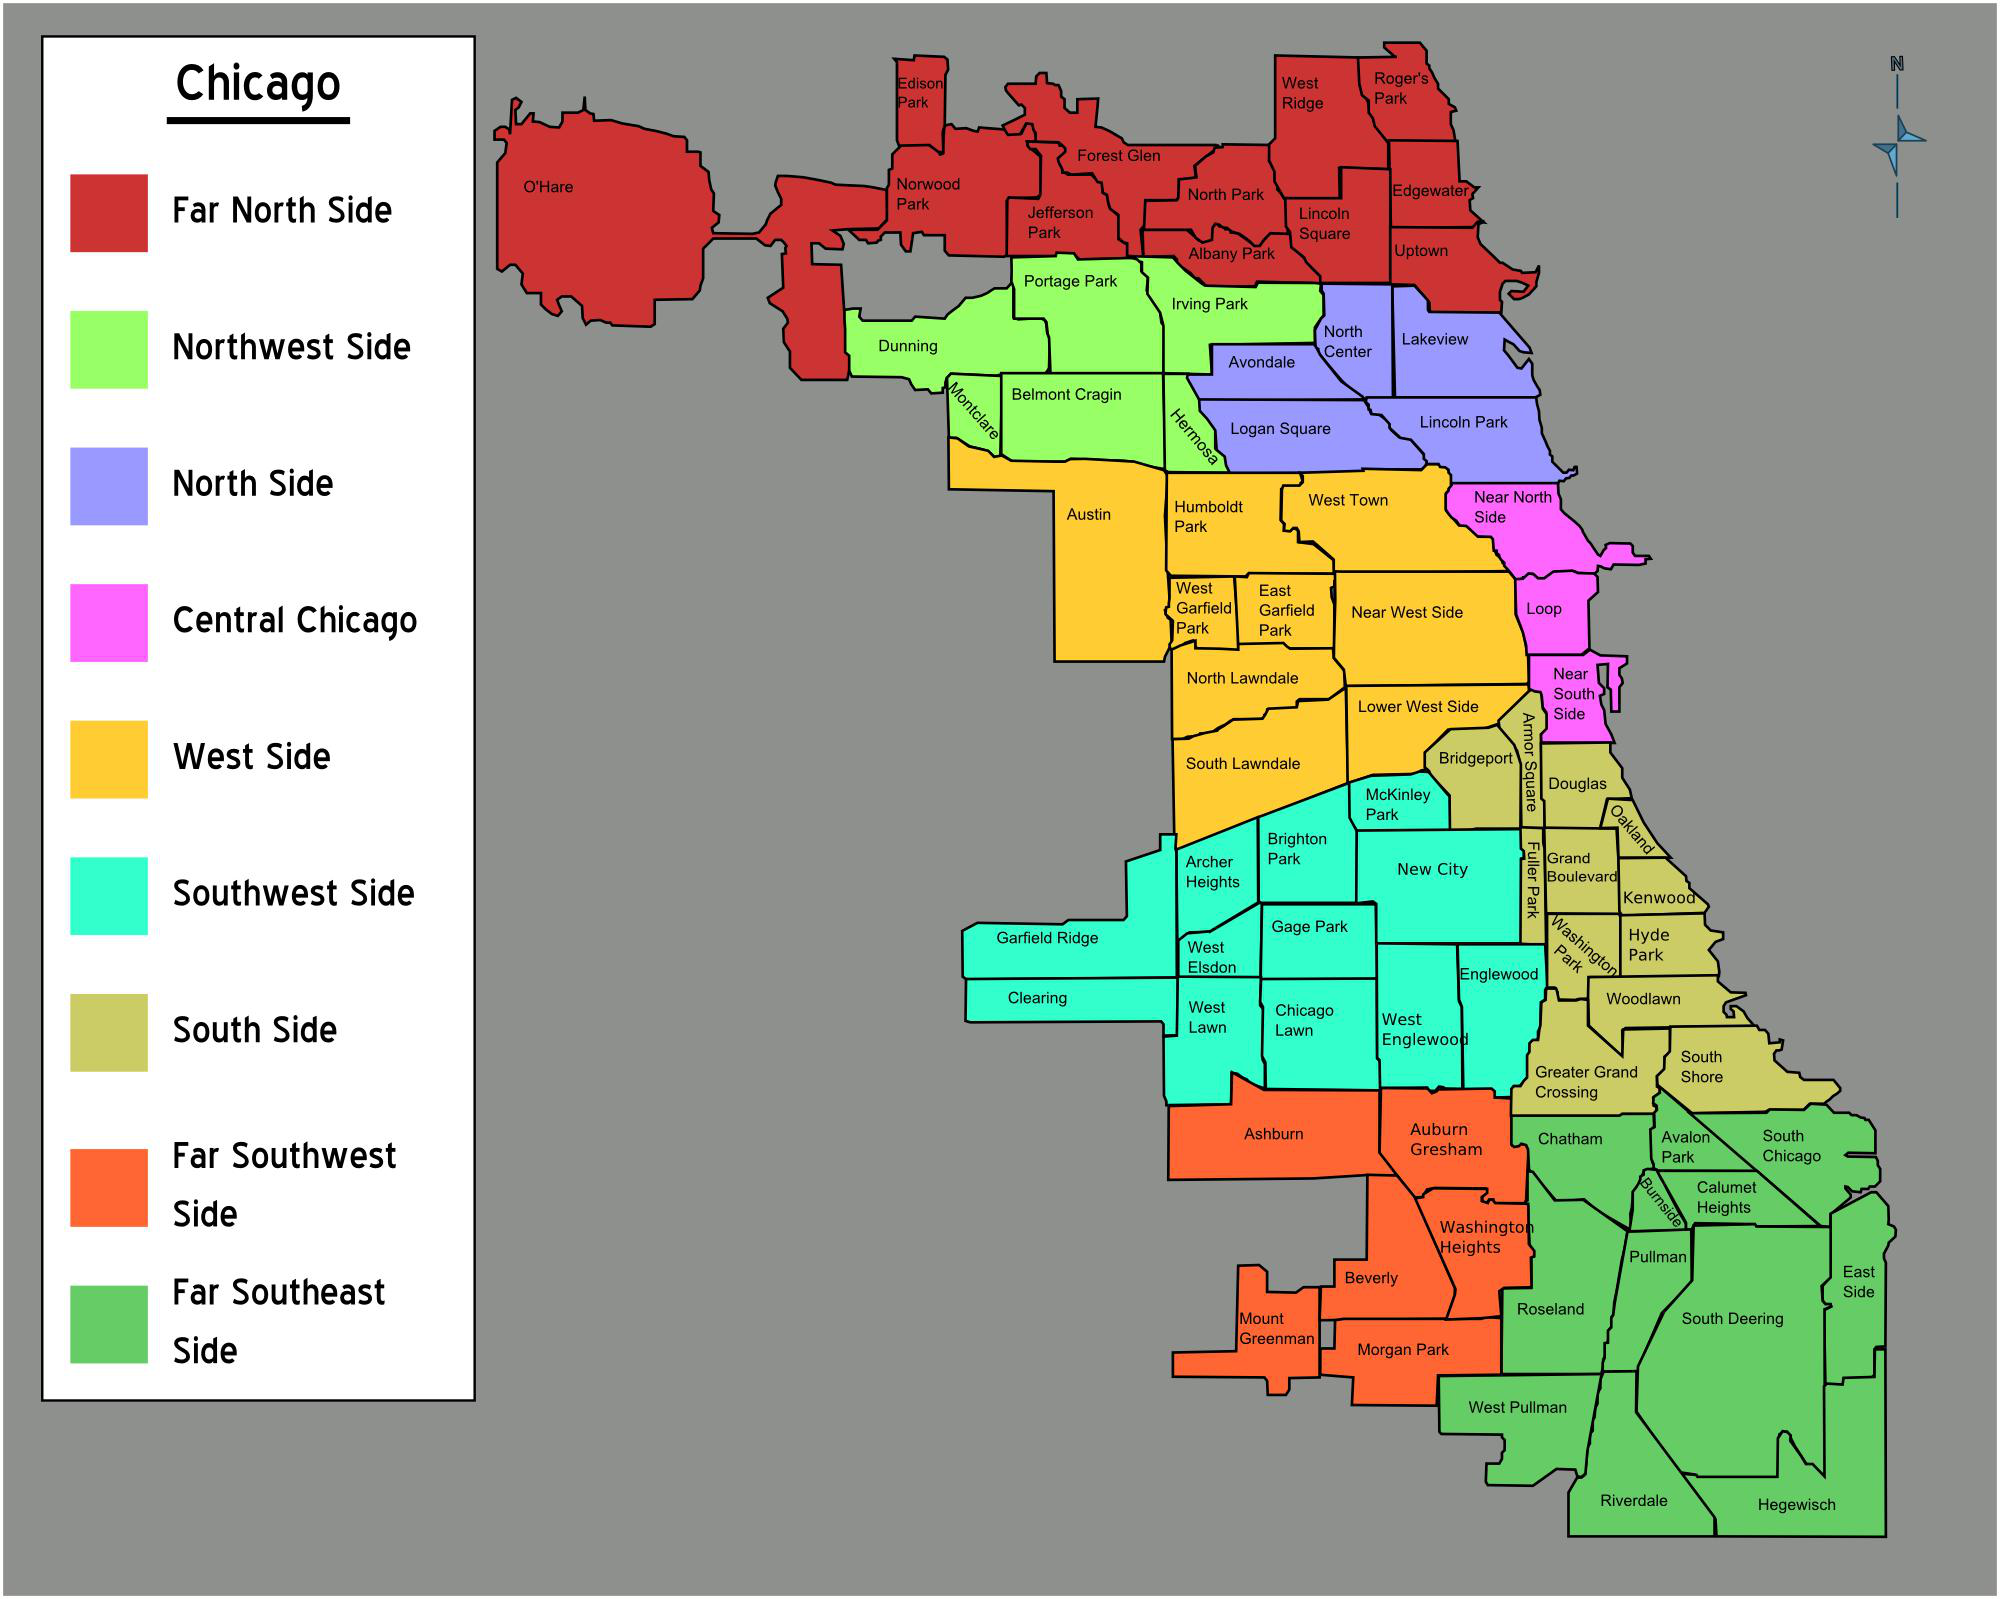

In [37]:
from PIL import Image
img = Image.open("chicago-districts-map")
img

- **The above image was pulled from the web and this image shows us the exact geographical location as the scatter plot above.**
- **image credit : https://chicagomap360.com/img/0/chicago-districts-map.jpg**

In [38]:
distr = pd.crosstab(index=data['District'], columns=data['Arrest'])
distr

Arrest     False  True 
District               
1.00       64889  24915
2.00       78474  28464
3.00       84624  29597
4.00       99415  29429
5.00       74303  25381
6.00       97077  34647
7.00       94755  36879
8.00      117299  35059
9.00       79449  30981
10.00      66476  30805
11.00      83797  61053
12.00      84899  25681
14.00      69627  18247
15.00      59064  38728
16.00      61324  14228
17.00      51501  13517
18.00      76470  23901
19.00      79056  21259
20.00      30331   9102
22.00      58047  15779
24.00      52374  15195
25.00      93546  34994
31.00         38     25

**The above distribution shows the number of arrest and non arrest made by district in the city of Chicago.**

**This can be shown below in a plot.**

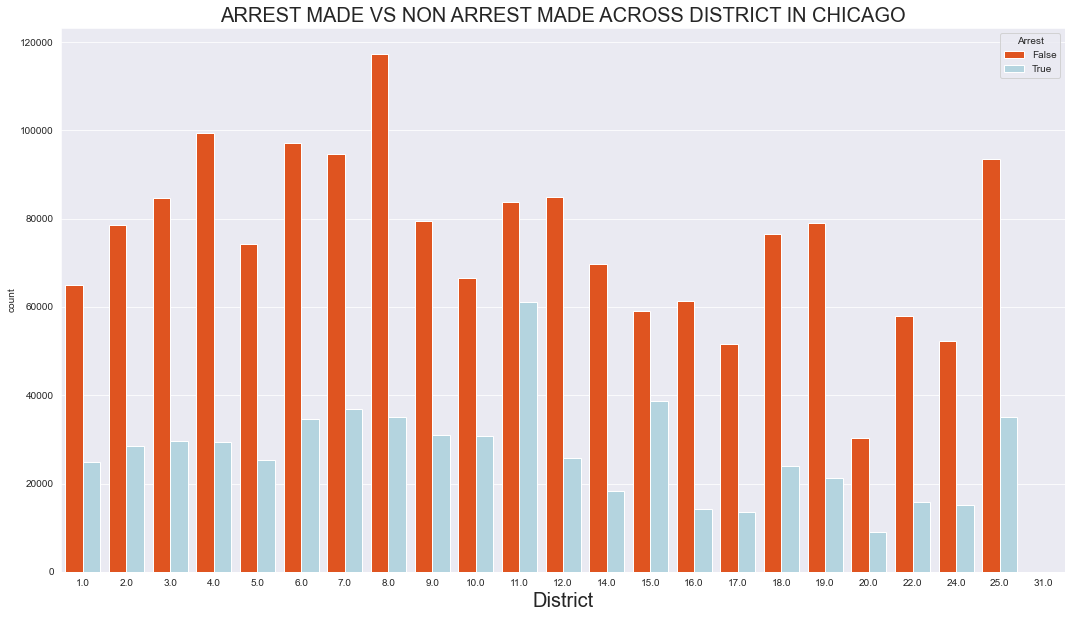

In [39]:
plt.figure(figsize=(18,10))
sns.countplot(x ='District', hue = 'Arrest', data = data, palette=['#FF4500', '#ADD8E6'])
plt.xlabel('District', fontsize= 20)
plt.title('ARREST MADE VS NON ARREST MADE ACROSS DISTRICT IN CHICAGO', fontsize= 20)
plt.show()

**After we made a scatter plot distribution of the district across Chicago, the question that comes to mind is to find out the number of arrest made per district.**


- **From the above plot, we can see that the number of arrest made by district compared to the number of arrest not made has a large margin. Only district '11.0' came close to making more arrest but it was not up to the number of arrest not made.**


- **The question remains what could be the problem, does the Chicago PD allow criminals who commit crime in Chicago go or did they lack enough balls to go after the criminals? This question needs to be answered.**


- **We will keep that in mind as we move on.**

# creating a new data frame where the primary type of crime is THEFT only.

- **There are alot of insight that can be gotten from this data. However, i am creating a new data frame to analyze crime since it is the highest type of crime in Chicago.**

In [40]:
newdata1 = data[data['Primary Type'] =='THEFT' ]
newdata1

Unnamed: 0        ID Case Number                    Date month   day  \
5                 5   1699235     G498287  08/21/2001 12:00:00 AM   Aug  Tue    
17               17   3447250    HK514345  07/23/2004 12:00:00 AM   Jul  Fri    
23               23   6593888    HP646969  10/23/2008 08:00:00 PM   Oct  Thu    
28               28   9365306    HW508438  10/26/2013 01:45:00 PM   Oct  Sat    
34               34  12252122    JD467371  12/19/2020 12:00:00 AM   Dec  Sat    
...             ...       ...         ...                     ...   ...   ...   
2278704     2278704   1317119     G009057  01/02/2001 09:00:00 AM   Jan  Tue    
2278706     2278706  10104907    HY293691  06/08/2015 07:30:00 PM   Jun  Mon    
2278707     2278707   9225806    HW372748  07/21/2013 05:20:00 PM   Jul  Sun    
2278716     2278716   6944094    HR349535  05/30/2009 05:00:00 PM   May  Sat    
2278720     2278720   6643262    HP714246  12/03/2008 05:30:00 AM   Dec  Wed    

            period                   Block  IUCR Primary Type  ...  Ward  \
5          Morning           003XX W 28 PL  0810        THEFT  ... 22.72   
17         Morning        009XX W GRACE ST  0820        THEFT  ... 44.00   
23           Night    003XX S MICHIGAN AVE  0820        THEFT  ...  2.00   
28       Afternoon    008XX N MICHIGAN AVE  0870        THEFT  ... 42.00   
34         Morning     005XX W DIVISION ST  0890        THEFT  ... 27.00   
...            ...                     ...   ...          ...  ...   ...   
2278704    Morning          011XX W 111 ST  0810        THEFT  ... 22.72   
2278706      Night     016XX W CORTLAND ST  0820        THEFT  ... 32.00   
2278707    Unknown     003XX W CHICAGO AVE  0820        THEFT  ... 27.00   
2278716    Unknown  089XX S COMMERCIAL AVE  0810        THEFT  ... 10.00   
2278720    Morning    056XX W CORNELIA AVE  0810        THEFT  ... 38.00   

        Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
5                37.54        06    1174343.00    1885951.00  2001   
17                6.00        06    1169111.00    1925516.00  2004   
23               32.00        06    1177339.00    1898916.00  2008   
28                8.00        06    1177330.00    1906499.00  2013   
34                8.00        06    1172284.00    1908265.00  2020   
...                ...       ...           ...           ...   ...   
2278704          37.54        06    1170502.00    1831224.00  2001   
2278706          22.00        06    1164954.00    1912712.00  2015   
2278707           8.00        06    1173639.00    1905658.00  2013   
2278716          46.00        06    1197693.00    1846366.00  2009   
2278720          15.00        06    1138111.00    1922705.00  2008   

                     Updated On  Latitude Longitude  \
5        08/17/2015 03:03:40 PM     41.84    -87.64   
17       02/28/2018 03:56:25 PM     41.95    -87.65   
23       02/10/2018 03:50:01 PM     41.88    -87.62   
28       02/10/2018 03:50:01 PM     41.90    -87.62   
34       12/26/2020 03:51:09 PM     41.90    -87.64   
...                         ...       ...       ...   
2278704  08/17/2015 03:03:40 PM     41.69    -87.65   
2278706  02/10/2018 03:50:01 PM     41.92    -87.67   
2278707  02/10/2018 03:50:01 PM     41.90    -87.64   
2278716  02/28/2018 03:56:25 PM     41.73    -87.55   
2278720  02/28/2018 03:56:25 PM     41.94    -87.77   

                              Location  
5        (41.842450075, -87.635700695)  
17        (41.95113401, -87.653750509)  
23       (41.877959571, -87.624313409)  
28       (41.898767916, -87.624116333)  
34        (41.903726889, -87.64259764)  
...                                ...  
2278704  (41.692357118, -87.651388315)  
2278706  (41.916088557, -87.669395892)  
2278707  (41.896543094, -87.637698101)  
2278716    (41.73327429, -87.55133578)  
2278720  (41.944038314, -87.767774454)  

[473434 rows x 26 columns]

**Since THEFT is a major crime in the city of Chicago, we will use this new data frame to answer most of our question.**

In [41]:
distr1= newdata1.groupby(['Primary Type','Year','Arrest']).size().unstack('Primary Type', fill_value=0)
distr

Arrest     False  True 
District               
1.00       64889  24915
2.00       78474  28464
3.00       84624  29597
4.00       99415  29429
5.00       74303  25381
6.00       97077  34647
7.00       94755  36879
8.00      117299  35059
9.00       79449  30981
10.00      66476  30805
11.00      83797  61053
12.00      84899  25681
14.00      69627  18247
15.00      59064  38728
16.00      61324  14228
17.00      51501  13517
18.00      76470  23901
19.00      79056  21259
20.00      30331   9102
22.00      58047  15779
24.00      52374  15195
25.00      93546  34994
31.00         38     25

- **The above distribution gives us a count of theft in Chicago from the year 2001 - 2022.**


- **It also shows the low arrest rate on THEFT made by the Chicago PD from 2001 - 2022**

   **However, this will be plotted below.**  

Text(0.5, 1.0, 'CHICAGO THEFT RATE: 2001 - 2022')

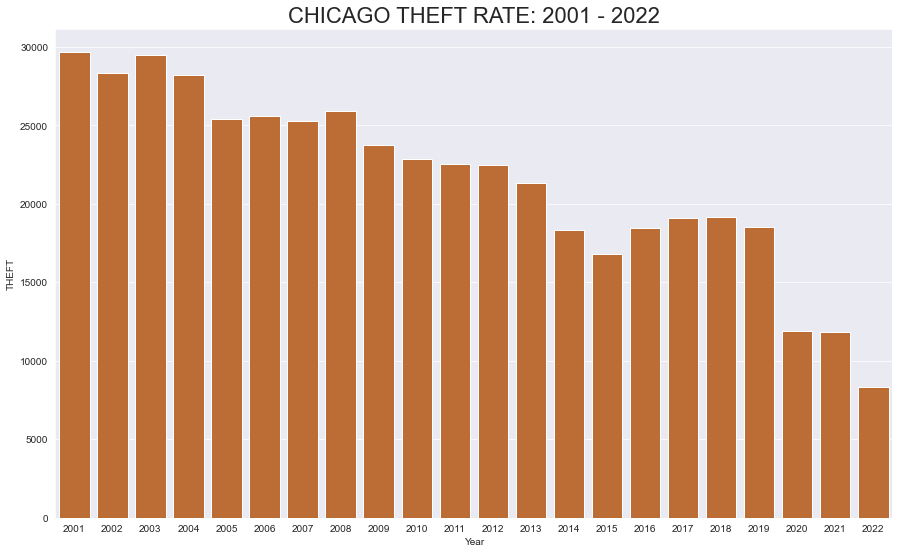

In [42]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year',
            y='THEFT',
            data=newdata1.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='#D2691E').\
            set_title("CHICAGO THEFT RATE: 2001 - 2022", fontsize= 22)

**From the above plot, there is a trend in theft as it increase and decreases across year.**

**What could be the cause of this trend in theft?**

In [43]:
distr2= newdata1.groupby(['Primary Type','Arrest']).size().unstack('Primary Type', fill_value=0)
distr2

Primary Type   THEFT
Arrest              
False         419482
True           53952

Text(0.5, 1.0, 'ARREST VS NON ARREST 2001-2022')

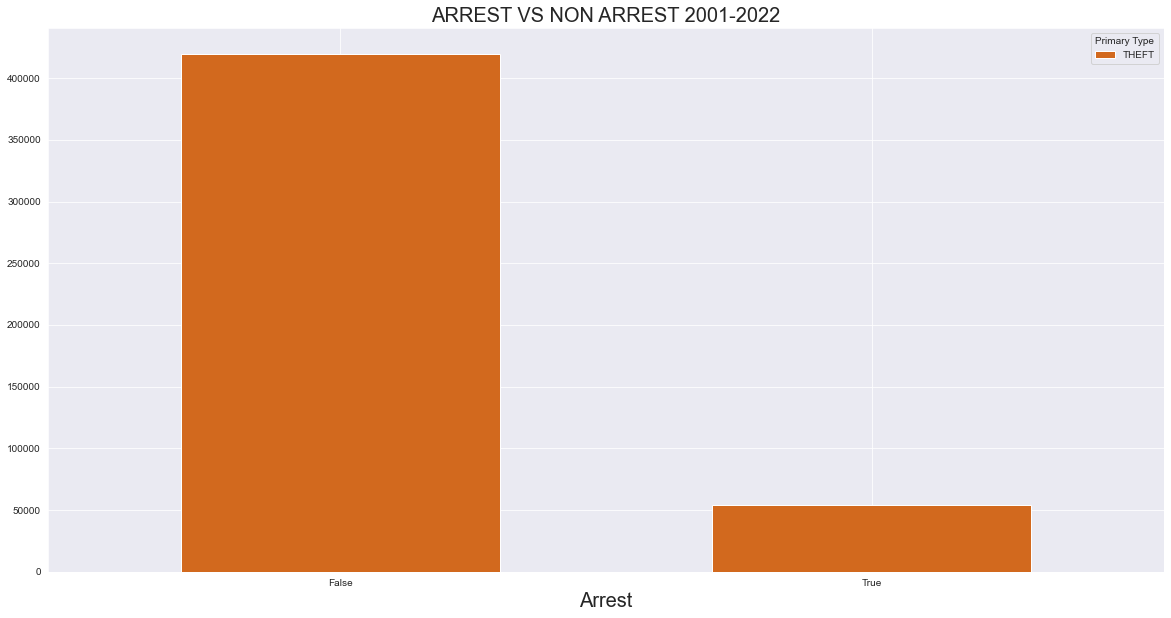

In [44]:
 distr2.plot.bar(figsize = (20,10), width= 0.6,rot= 0,color='#D2691E')
plt.xlabel('Arrest', fontsize= 20)   
plt.title('ARREST VS NON ARREST 2001-2022', fontsize= 20)

- **We can see that the inability to make arrest is more than arrest made.**

- **we can say that the low arrest rate brought about the rise in theft, as criminals feel they can always get away with crime in Chicago.**



# The question What could be the cause of this trend in theft can be answered using the above plot seeing the low arrest rate over time.

In [45]:
def toString(x):     # function converting int to string
    return str(int(x))

theft_years = newdata1.groupby(['District']).count().Arrest.reset_index() #grouping the district feture and reseting the index
theft_years['District'] = theft_years['District'].apply(toString) #applying the function

# ______________________________________________________#

chicago = location=[41.85, -87.68] #initiates the folium map
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
#Creating the choropleth
m.choropleth(
    geo_data='chicago_police_districts.json', #geo-json file containing coordinates
    name='choropleth',
    data=theft_years,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num', # matching elements from the `geo-json` data
    fill_color='YlOrRd',                   # main colour on the map
    fill_opacity=0.4,                      # main colour scheme opacity
    line_opacity=0.2,                       # borders opacity
    legend_name='Theft per Police District : 2001-2022',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)  #control the initial zoom and tiles that control the map. 
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map0.html") 
IFrame('map0.html', width=990, height=700) #html components to display map

  **The above map shows districts with the most theft from a period of 2001 - 2022.**

- **Over the years, theft happened in all districts across Chicago, but the areas with the most theft as shown in the map are marked red and these areas include the Central chicago, westside, north side, southwest side.**

- **Theft in Chicago can be said to be connected geographically from one district to another.**


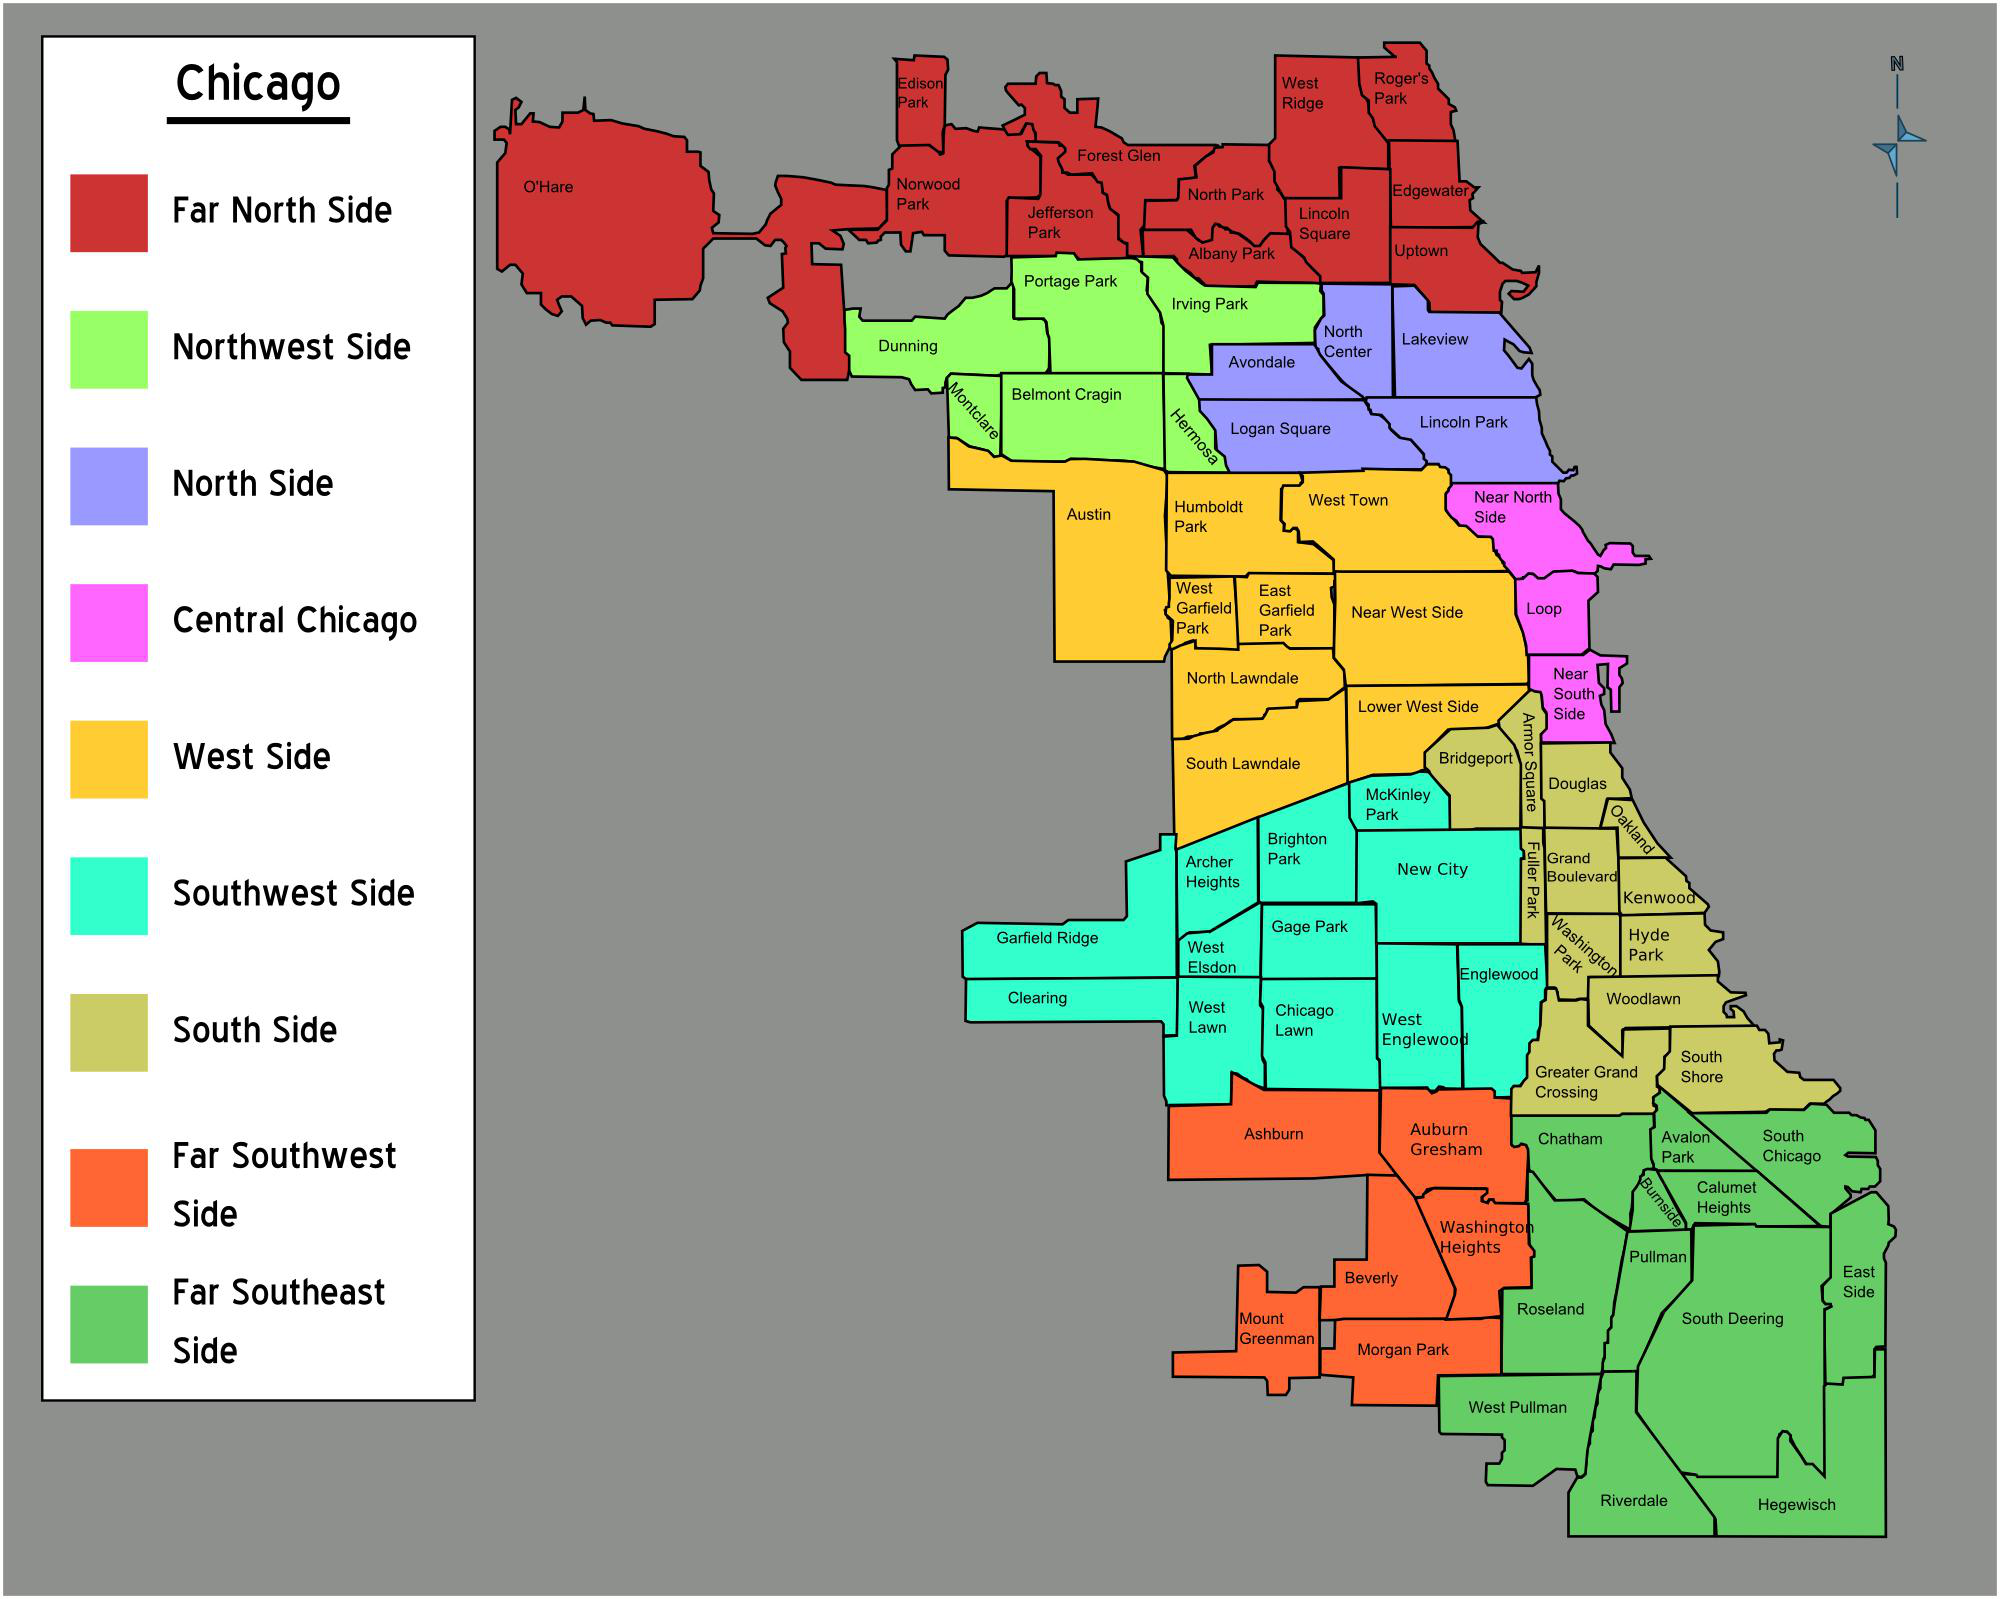

In [46]:
img = Image.open("chicago-districts-map")
img

**The above image helps illustrate theft across district.**

Text(0.5, 1.0, 'THEFT - DOMESTIC RATE BY YEAR')

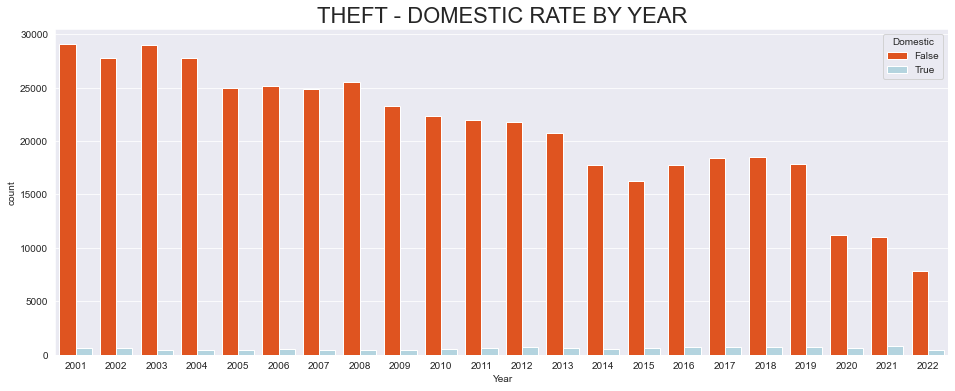

In [47]:
fig, ax = plt.subplots(figsize=(16,6))
large_to_small = newdata1.groupby('month').size().sort_values().index[::-1]
the_ft = newdata1[['Year','Domestic']]
ax = sns.countplot(x="Year",
                   hue='Domestic',
                   data=the_ft,
                   palette=['#FF4500', '#ADD8E6'])
plt.title('THEFT - DOMESTIC RATE BY YEAR', fontsize= 22)

  **The above plot shows if Theft from the year 2001 - 2022 was domestic or not.**

- **Majority of the crime (Theft) was not influenced by domestic action as the plot showed little or no influence of           domestic action on theft.**

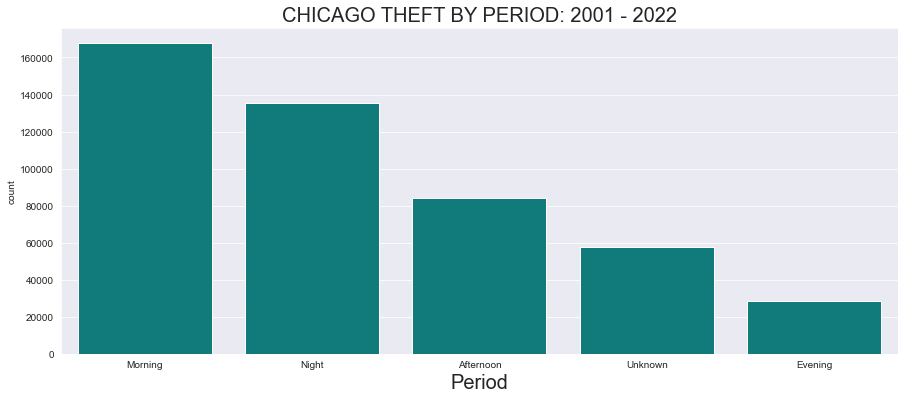

In [48]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data= newdata1, x='period',color='#008B8B')
plt.xlabel('Period', fontsize= 20) 
plt.title('CHICAGO THEFT BY PERIOD: 2001 - 2022', fontsize= 20)
plt.show()

- **The above plot shows the period when theft happens.**


- **Theft happens more during the morning period. Looking at the the busy & crowded city of Chicago, it can be said that crime happen mostly during the dark hours and this dark hours can also be attributed to some period in the morning and this can account for the second rise in crime which is the Night period.**


- **It can also be said from the above plot that theft also happen at night because Chicago is a very busy place.**


- **Theft also happen during the evening period more than it happens in the morning. The unknown from the plot can be said to be a period that wasn't defined from the Chicago PD data base & it shows that all theft has a said period.**





Text(0.5, 1.0, 'Top 20 Blocks Where Theft Happens In Chicago: 2001 - 2022')

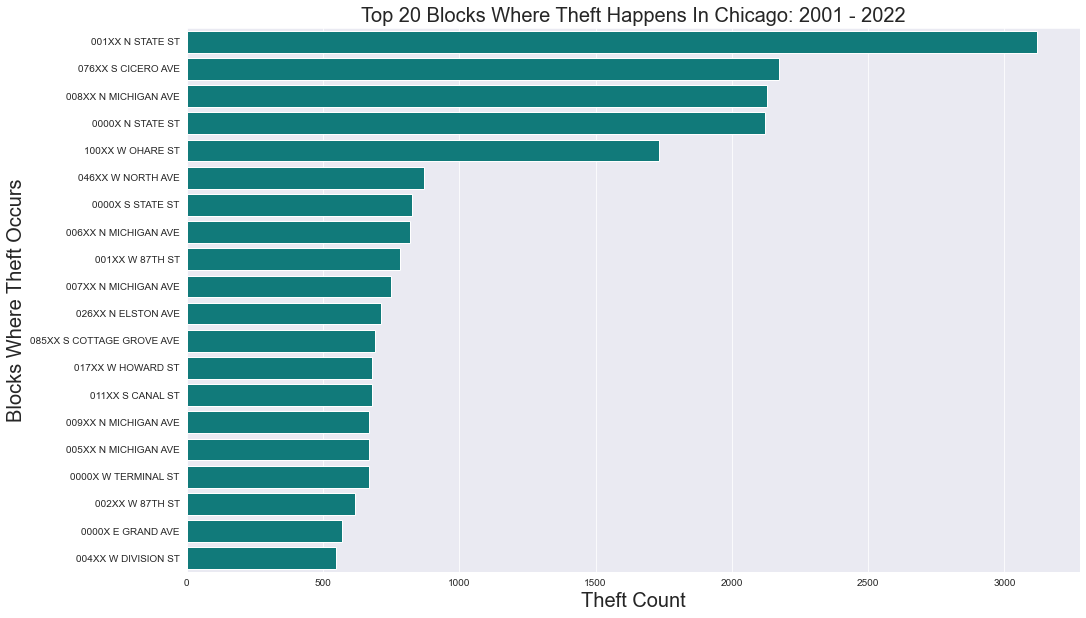

In [49]:
fig= plt.figure(figsize=(16,10))
sns.countplot(y ='Block',data= newdata1,color='#008B8B',
             order=newdata1['Block'].value_counts().iloc[:20].index)
plt.ylabel('Blocks Where Theft Occurs', fontsize= 20)
plt.xlabel('Theft Count', fontsize= 20)

plt.title('Top 20 Blocks Where Theft Happens In Chicago: 2001 - 2022', fontsize= 20)

- **From the above, the 'N STATE STREET' is the most dangerous place where Theft happens in Chicago. The N state street is a very busy place, it is a place where you meet anyone you know, a place of retail and business and this can be attributed for the rise in theft for that Block.**

 **Source:https://chicagology.com/chicagostreets/statestreet/**

- **Using the partial address 's cicero ave chicago' which is the second highest place where theft happens in Chicago, the high rate in crime can be attributed to the connection the area has to link to other places and it has been attributed to a get away for crimnials due to those road connections. Also, back in the days that hub was the hub of different crime gangstars in Chicago. It may seem as though these criminals didnt varnish over the years as they continue to develop their roots there.**

 **Source:https://www.movoto.com/guide/cicero-il/cicero-stereotypes/#:~:text=Because%20Cicero%20is%20situated%20next,by%20the%20Western%20Electric%20Company.**


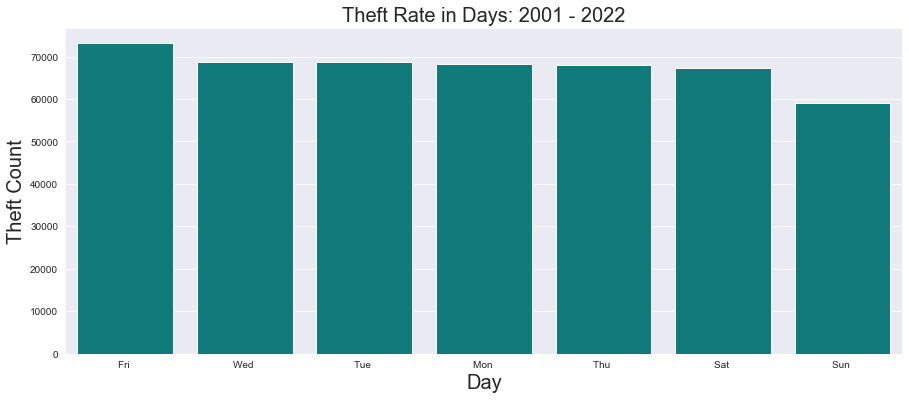

In [50]:
fig, ax = plt.subplots(figsize=(15,6))
large_to_small1 = newdata1.groupby('day').size().sort_values().index[::-1]
sns.countplot(data= newdata1, x='day',order=large_to_small1, color='#008B8B')
plt.xlabel('Day', fontsize= 20) 
plt.ylabel('Theft Count', fontsize= 20) 
plt.title('Theft Rate in Days: 2001 - 2022', fontsize= 20)
plt.show()

   **The above plot shows the rate of theft during weekdays.**
   

- **Friday is the most day theft happens in Chicago.**

 
- **From the above plot, it shows that theft can happen day in the city of Chicago as there is no specific day of the week from Monday through Sunday when Theft can happen.**

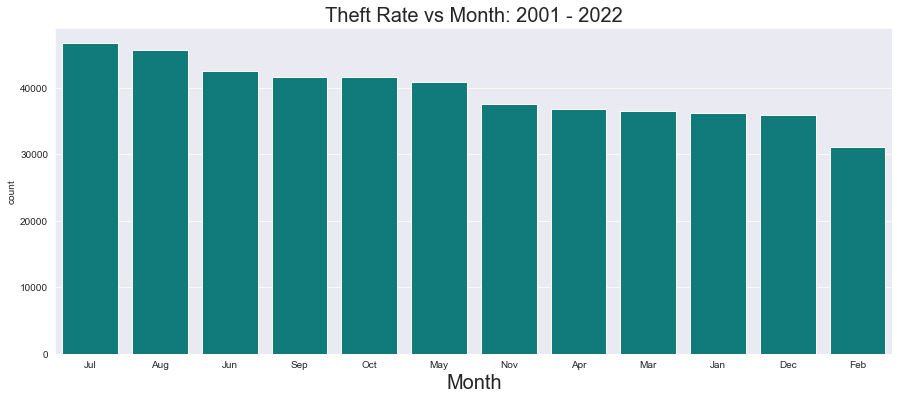

In [51]:
fig, ax = plt.subplots(figsize=(15,6))
large_to_small = newdata1.groupby('month').size().sort_values().index[::-1]
sns.countplot(x='month',data= newdata1, order=large_to_small, color='#008B8B')
plt.xlabel('Month', fontsize= 20) 
plt.title('Theft Rate vs Month: 2001 - 2022', fontsize= 20)
plt.show()

- **The above plot shows Theft rate in month.**

- **From the plot, the month with the highest rate in theft is July followed by August, this period is classifed as summer in Chicago, and can be said to be attributed as a peak period in Chicago where Chicagoans love to come out and have a feel of the sun. During this period there are several activities and alot of tourist come to Chicago. The month of july in Chicago features warm afternoons and evenings with mostly comfortable mornings.**

- **This can also be attributed for the increase in crime for the month of June as it is the beginning of Summer.
  **Source- https://www.tripsavvy.com/best-time-to-visit-chicago-4175898**
 

- **During the summer period, children are let out of school, they are less busy. Children being less busy can get into a lot of trouble as the average age of those who commit crime is betwwen ages 17 - 30.**
**Source:https://law.jrank.org/pages/473/Age-Crime-Age-crime-patterns-U-S.html**

- **September, October, November has a fall in Theft rate from July through August, this can be attributed to the warm weather around the month of September & October also know as _FALL_. As it gets cold by month, people and activities reduces. This can account for the drop in crime by November.**
**Source:https://www.climatestotravel.com/climate/united-states/chicago**


- **December,January & February saw a fall in Theft due to the cold period known as winter**


- **The month of March, April through May saw a slight rise in theft as this month is the spring period. This period of the months is also the best time to visit Chicago as tourist visit during these months. This accounts for the increase in crime during these months.**
**Source:https://travel.usnews.com/Chicago_IL/When_To_Visit/**






# CREATING A NEW DATA FRAME WHEN YEAR IS 2001

In [52]:
newdata2 = data[data['Year'] ==2001 ]
newdata2

Unnamed: 0       ID Case Number                    Date month   day  \
5                 5  1699235     G498287  08/21/2001 12:00:00 AM   Aug  Tue    
30               30  1496484     G223033  03/20/2001 12:01:00 AM   Mar  Tue    
56               56  1469842     G192777  04/05/2001 12:07:52 PM   Apr  Thu    
66               66  1844943     G674809  11/09/2001 09:15:07 AM   Nov  Fri    
129             129  1328700     G019278  01/09/2001 12:25:00 AM   Jan  Tue    
...             ...      ...         ...                     ...   ...   ...   
2278641     2278641  1371004     G078303  02/07/2001 01:39:47 PM   Feb  Wed    
2278666     2278666  1620323     G397857  07/08/2001 04:00:00 AM   Jul  Sun    
2278696     2278696  1834297     G669143  11/06/2001 04:01:00 PM   Nov  Tue    
2278704     2278704  1317119     G009057  01/02/2001 09:00:00 AM   Jan  Tue    
2278722     2278722  1740109     G546340  09/11/2001 10:20:00 PM   Sep  Tue    

            period                  Block  IUCR         Primary Type  ...  \
5          Morning          003XX W 28 PL  0810                THEFT  ...   
30         Morning     065XX S JUSTINE ST  1120   DECEPTIVE PRACTICE  ...   
56           Night  034XX S MARSHFIELD AV  2027            NARCOTICS  ...   
66         Morning   019XX N NEWCASTLE AV  0460              BATTERY  ...   
129        Morning     022XX W AINSLIE ST  141C    WEAPONS VIOLATION  ...   
...            ...                    ...   ...                  ...  ...   
2278641  Afternoon  028XX S CALIFORNIA AV  0291  CRIM SEXUAL ASSAULT  ...   
2278666    Morning          010XX W 14 ST  0460              BATTERY  ...   
2278696    Evening    047XX N KEYSTONE AV  0460              BATTERY  ...   
2278704    Morning         011XX W 111 ST  0810                THEFT  ...   
2278722      Night        052XX W LAKE ST  0460              BATTERY  ...   

         Ward Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
5       22.72          37.54        06    1174343.00    1885951.00  2001   
30      22.72          37.54        10    1167101.00    1860991.00  2001   
56      22.72          37.54        18    1165949.00    1881994.00  2001   
66      22.72          37.54       08B    1130490.00    1912121.00  2001   
129     22.72          37.54        15    1160625.00    1932465.00  2001   
...       ...            ...       ...           ...           ...   ...   
2278641 22.72          37.54        02    1158192.00    1885348.00  2001   
2278666 22.72          37.54       08B    1169878.00    1893534.00  2001   
2278696 22.72          37.54       08B    1148593.00    1930796.00  2001   
2278704 22.72          37.54        06    1170502.00    1831224.00  2001   
2278722 22.72          37.54       08B    1141137.00    1902008.00  2001   

                     Updated On  Latitude Longitude  \
5        08/17/2015 03:03:40 PM     41.84    -87.64   
30       08/17/2015 03:03:40 PM     41.77    -87.66   
56       08/17/2015 03:03:40 PM     41.83    -87.67   
66       08/17/2015 03:03:40 PM     41.92    -87.80   
129      08/17/2015 03:03:40 PM     41.97    -87.68   
...                         ...       ...       ...   
2278641  08/17/2015 03:03:40 PM     41.84    -87.69   
2278666  08/17/2015 03:03:40 PM     41.86    -87.65   
2278696  08/17/2015 03:03:40 PM     41.97    -87.73   
2278704  08/17/2015 03:03:40 PM     41.69    -87.65   
2278722  08/17/2015 03:03:40 PM     41.89    -87.76   

                              Location  
5        (41.842450075, -87.635700695)  
30       (41.774115391, -87.662991148)  
56        (41.83177464, -87.666616946)  
66       (41.915129101, -87.796030123)  
129      (41.970382826, -87.684751274)  
...                                ...  
2278641  (41.841140084, -87.694986861)  
2278666  (41.863356822, -87.651865066)  
2278696  (41.966044397, -87.729037251)  
2278704  (41.692357118, -87.651388315)  
2278722  (41.887188151, -87.757163155)  

[145384 rows x 26 columns]

**This data frame was created to see how crime started and what caused the peak in crime from year 2001 - 2004.**

In [53]:
newdata2.groupby('Primary Type')['Primary Type'].count().sort_values()

Primary Type
OTHER NARCOTIC VIOLATION                1
PUBLIC INDECENCY                        2
RITUALISM                               3
CRIMINAL SEXUAL ASSAULT                 5
OBSCENITY                              11
STALKING                               64
INTIMIDATION                           88
INTERFERENCE WITH PUBLIC OFFICER      146
HOMICIDE                              194
GAMBLING                              263
KIDNAPPING                            283
ARSON                                 293
LIQUOR LAW VIOLATION                  466
CRIM SEXUAL ASSAULT                   527
SEX OFFENSE                           631
OFFENSE INVOLVING CHILDREN            728
PUBLIC PEACE VIOLATION                830
WEAPONS VIOLATION                    1237
PROSTITUTION                         1762
CRIMINAL TRESPASS                    3970
DECEPTIVE PRACTICE                   4350
ROBBERY                              5507
BURGLARY                             7812
MOTOR VEHICLE THEFT  

**A count on the crime type in year 2001.**

**The above distribution will be ploted below.**

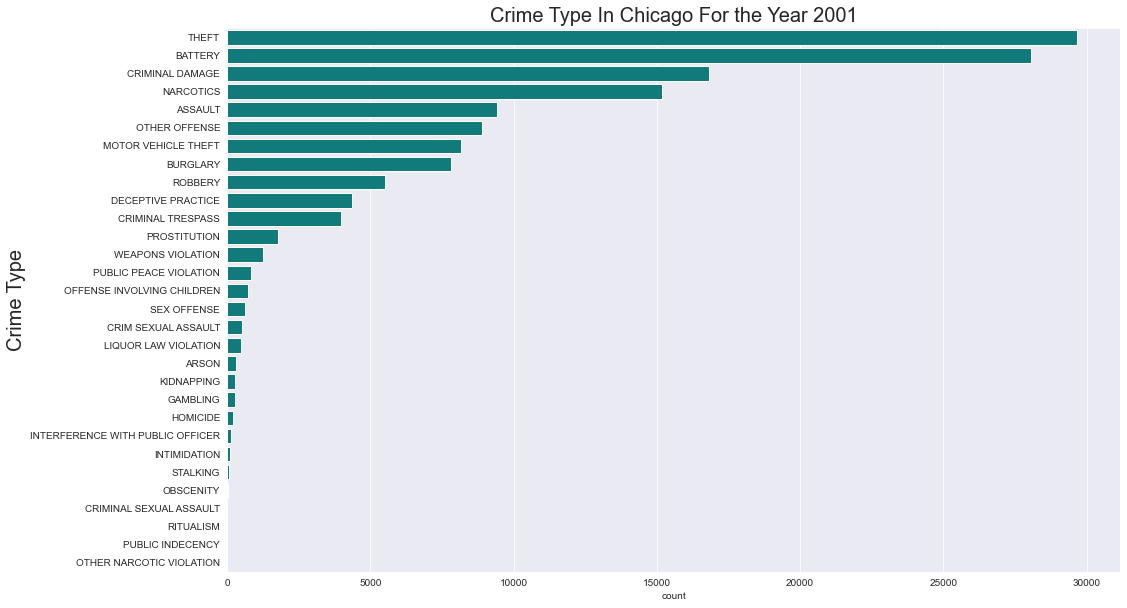

In [54]:
fig= plt.figure(figsize=(16,10))
large_to_small1 = newdata2.groupby('Primary Type').size().sort_values().index[::-1]
sns.countplot(data= newdata2, y='Primary Type',order=large_to_small1,  color='#008B8B')
plt.ylabel('Crime Type', fontsize= 20) 
plt.title('Crime Type In Chicago For the Year 2001', fontsize= 20)
plt.show()

**From the plot, the top 5 crimes in 2001 were THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, ASSAULT. Other Offense was also on the rise and close to ASSAULT.**

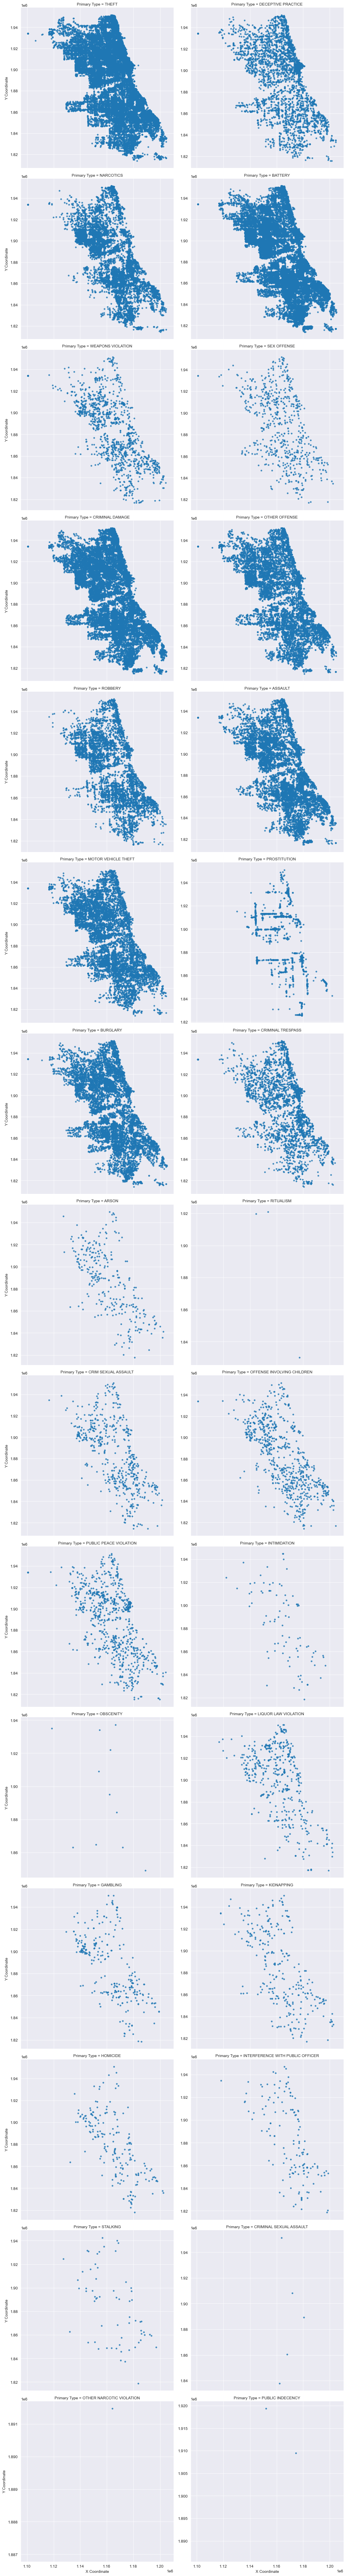

In [55]:
s = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=newdata2, 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,     #prevent share y axes across columns
               scatter_kws={"marker": "D",   #visualize the plot better
                            "s": 10})

- **From the above plot We can  see that majority of the crimes were already all over town & growing rapidly. The Chicago Pd would have given more attention to these trends.**
- **We can say also that these crime increase from the period of 2001 - 2004 could be as a recession crisis faced by the United state in 2001, as many were unemployed.**

In [56]:
newdata2.groupby('Arrest')['Arrest'].count().sort_values()

Arrest
True      42482
False    102902
Name: Arrest, dtype: int64

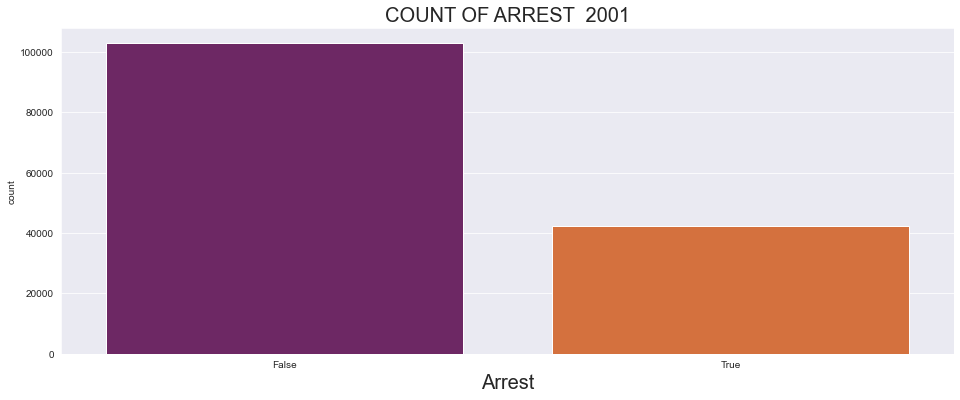

In [57]:
fig= plt.figure(figsize=(16,6))
total = int(len(newdata2))
ax = sns.countplot(data= newdata2, x='Arrest', palette='inferno')
plt.xlabel('Arrest', fontsize= 20)
plt.title('COUNT OF ARREST  2001', fontsize= 20)

plt.show()

**The above plot shows total arrest made vs total arrest not made in 2001. Crime rate was high in 2001, the arrest not made was high as against arrest made.**

# Creating a new day frame to see the count of Arrest for 2004 & 2005 to see why Crime Reduced

In [58]:
newdata5 = data[data['Year'] ==2004 ]
newdata5

Unnamed: 0       ID Case Number                    Date month   day  \
13               13  3298634    HK328238  04/25/2004 04:00:00 PM   Apr  Sun    
17               17  3447250    HK514345  07/23/2004 12:00:00 AM   Jul  Fri    
25               25  3376825    HK428100  06/13/2004 06:00:00 AM   Jun  Sun    
27               27  3682751    HK783218  09/05/2004 06:00:00 PM   Sep  Sun    
39               39  3332372    HK373656  05/18/2004 04:30:00 PM   May  Tue    
...             ...      ...         ...                     ...   ...   ...   
2278649     2278649  3694974    HK794384  12/04/2004 01:00:00 PM   Dec  Sat    
2278672     2278672  3664143    HK763762  11/20/2004 09:00:00 AM   Nov  Sat    
2278705     2278705  3480927    HK552040  08/11/2004 10:00:00 PM   Aug  Wed    
2278708     2278708  3328553    HK310063  04/18/2004 08:20:00 PM   Apr  Sun    
2278725     2278725  3409804    HK420105  06/09/2004 08:19:28 PM   Jun  Wed    

            period                    Block  IUCR                Primary Type  \
13         Evening       076XX S HALSTED ST  2830               OTHER OFFENSE   
17         Morning         009XX W GRACE ST  0820                       THEFT   
25         Morning     078XX S PHILLIPS AVE  0910         MOTOR VEHICLE THEFT   
27         Unknown        077XX S PEORIA ST  1130          DECEPTIVE PRACTICE   
39         Evening        048XX N AVERS AVE  0910         MOTOR VEHICLE THEFT   
...            ...                      ...   ...                         ...   
2278649  Afternoon         026XX W 100TH PL  1780  OFFENSE INVOLVING CHILDREN   
2278672    Morning  032XX S SPRINGFIELD AVE  2830               OTHER OFFENSE   
2278705      Night     119XX S MICHIGAN AVE  0326                     ROBBERY   
2278708      Night       045XX S CICERO AVE  1506                PROSTITUTION   
2278725      Night      016XX N ROCKWELL ST  1811                   NARCOTICS   

         ...  Ward Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
13       ... 17.00          71.00        17    1172289.00    1854284.00  2004   
17       ... 44.00           6.00        06    1169111.00    1925516.00  2004   
25       ...  7.00          43.00        07    1193891.00    1853377.00  2004   
27       ... 17.00          71.00        11    1171649.00    1853451.00  2004   
39       ... 39.00          14.00        07    1149836.00    1932026.00  2004   
...      ...   ...            ...       ...           ...           ...   ...   
2278649  ... 19.00          72.00        26    1160566.00    1837897.00  2004   
2278672  ... 22.00          30.00        17    1150887.00    1882854.00  2004   
2278705  ...  9.00          53.00        03    1178993.00    1825600.00  2004   
2278708  ... 23.00          56.00        16    1145122.00    1874102.00  2004   
2278725  ...  1.00          24.00        18    1158782.00    1910845.00  2004   

                     Updated On  Latitude Longitude  \
13       02/28/2018 03:56:25 PM     41.76    -87.64   
17       02/28/2018 03:56:25 PM     41.95    -87.65   
25       02/10/2018 03:50:01 PM     41.75    -87.57   
27       02/28/2018 03:56:25 PM     41.75    -87.65   
39       02/28/2018 03:56:25 PM     41.97    -87.72   
...                         ...       ...       ...   
2278649  02/28/2018 03:56:25 PM     41.71    -87.69   
2278672  02/28/2018 03:56:25 PM     41.83    -87.72   
2278705  02/28/2018 03:56:25 PM     41.68    -87.62   
2278708  02/28/2018 03:56:25 PM     41.81    -87.74   
2278725  02/28/2018 03:56:25 PM     41.91    -87.69   

                              Location  
13       (41.755598022, -87.644169941)  
17        (41.95113401, -87.653750509)  
25       (41.752607015, -87.565034748)  
27       (41.753326207, -87.646539749)  
39       (41.969395454, -87.724434795)  
...                                ...  
2278649  (41.710879114, -87.687582617)  
2278672  (41.834442083, -87.721858991)  
2278705  (41.676735364, -87.620471921)  
2278708   (41.810535969, -87.74

In [59]:
newdata5.groupby('Arrest')['Arrest'].count().sort_values()

Arrest
True     43201
False    96972
Name: Arrest, dtype: int64

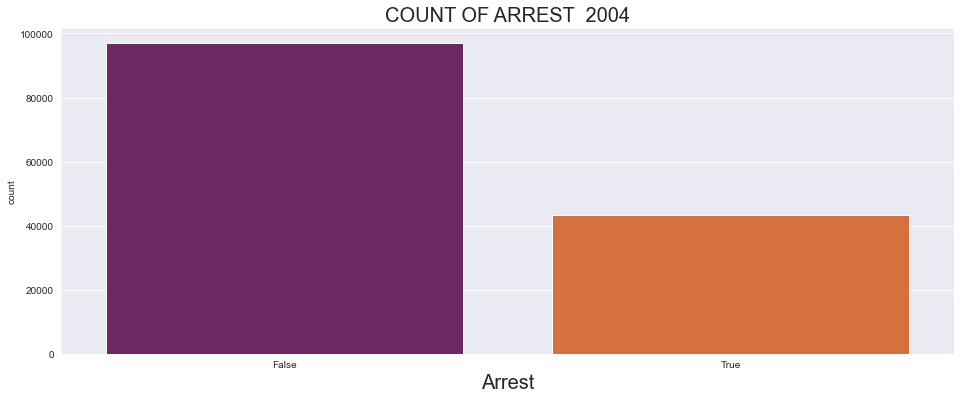

In [60]:
fig= plt.figure(figsize=(16,6))
total = int(len(newdata5))
ax = sns.countplot(data= newdata5, x='Arrest', palette='inferno')
plt.xlabel('Arrest', fontsize= 20)
plt.title('COUNT OF ARREST  2004', fontsize= 20)

plt.show()

**The above plot shows arrest rate made vs arrest not made in 2004. We can see that arrest made has an increase and this was a period when criminal techniques like installation of cameras on the street, shops, walk way street starterd in Chicago. This brought a reduction in the false arrest as against 2001.**

In [61]:
newdata6 = data[data['Year'] ==2005 ]
newdata6

Unnamed: 0       ID Case Number                    Date month   day  \
44               44  4166383    HL498401  07/18/2005 03:15:00 PM   Jul  Mon    
46               46  4000935    HL360720  05/16/2005 10:45:00 PM   May  Mon    
73               73  4408417    HL702520  10/29/2005 11:28:34 AM   Oct  Sat    
93               93  4012831    HL368766  05/20/2005 08:00:00 AM   May  Fri    
97               97  3862003    HL207970  02/28/2005 10:38:54 PM   Feb  Mon    
...             ...      ...         ...                     ...   ...   ...   
2278644     2278644  3814613    HL182807  02/15/2005 02:30:00 AM   Feb  Tue    
2278647     2278647  4558430    HL782721  12/11/2005 12:35:00 AM   Dec  Sun    
2278656     2278656  3751541    HL118346  01/11/2005 12:20:00 PM   Jan  Tue    
2278663     2278663  3842076    HL213068  03/03/2005 02:38:00 PM   Mar  Thu    
2278687     2278687  3897756    HL272002  04/03/2005 02:00:00 PM   Apr  Sun    

            period                 Block  IUCR       Primary Type  ...  Ward  \
44       Afternoon       003XX E 55TH PL  1310    CRIMINAL DAMAGE  ... 20.00   
46           Night   029XX S DEARBORN ST  0460            BATTERY  ...  3.00   
73         Morning       011XX E 81ST ST  0486            BATTERY  ...  8.00   
93         Morning    002XX N CICERO AVE  0460            BATTERY  ... 28.00   
97           Night      025XX N CLARK ST  1811          NARCOTICS  ... 43.00   
...            ...                   ...   ...                ...  ...   ...   
2278644    Morning  033XX W PETERSON AVE  0620           BURGLARY  ... 39.00   
2278647    Morning  120XX S MICHIGAN AVE  1811          NARCOTICS  ...  9.00   
2278656      Night     027XX W OGDEN AVE  1350  CRIMINAL TRESPASS  ... 28.00   
2278663  Afternoon    038XX S WABASH AVE  0560            ASSAULT  ...  3.00   
2278687  Afternoon  061XX S ARTESIAN AVE  0486            BATTERY  ... 15.00   

        Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
44               40.00        14    1179459.00    1868298.00  2005   
46               35.00       08B    1176241.00    1885750.00  2005   
73               45.00       08B    1185367.00    1851526.00  2005   
93               25.00       08B    1144339.00    1901076.00  2005   
97                7.00        18    1172239.00    1917466.00  2005   
...                ...       ...           ...           ...   ...   
2278644          13.00        05    1152808.00    1939677.00  2005   
2278647          53.00        18    1179001.00    1825334.00  2005   
2278656          29.00        26    1158463.00    1892956.00  2005   
2278663          35.00       08A    1177357.00    1879634.00  2005   
2278687          66.00       08B    1161091.00    1863916.00  2005   

                     Updated On  Latitude Longitude  \
44       02/28/2018 03:56:25 PM     41.79    -87.62   
46       02/28/2018 03:56:25 PM     41.84    -87.63   
73       02/28/2018 03:56:25 PM     41.75    -87.60   
93       02/28/2018 03:56:25 PM     41.88    -87.75   
97       02/28/2018 03:56:25 PM     41.93    -87.64   
...                         ...       ...       ...   
2278644  02/10/2018 03:50:01 PM     41.99    -87.71   
2278647  02/28/2018 03:56:25 PM     41.68    -87.62   
2278656  02/28/2018 03:56:25 PM     41.86    -87.69   
2278663  02/28/2018 03:56:25 PM     41.83    -87.62   
2278687  02/10/2018 03:50:01 PM     41.78    -87.68   

                              Location  
44       (41.793893249, -87.617466306)  
46       (41.841855999, -87.628741678)  
73       (41.747732317, -87.596329316)  
93       (41.884571034, -87.745427795)  
97       (41.928975874, -87.642490687)  
...                                ...  
2278644  (41.990331753, -87.713303027)  
2278647  (41.676005238, -87.620450694)  
2278656   (41.862011728, -87.69378445)  
2278663  (41.825048022, -87.624831462)  
2278687  (41.782268435, -87.684941919)  

[134647 rows x 26 columns]

In [62]:
newdata6.groupby('Arrest')['Arrest'].count().sort_values()

Arrest
True     41857
False    92790
Name: Arrest, dtype: int64

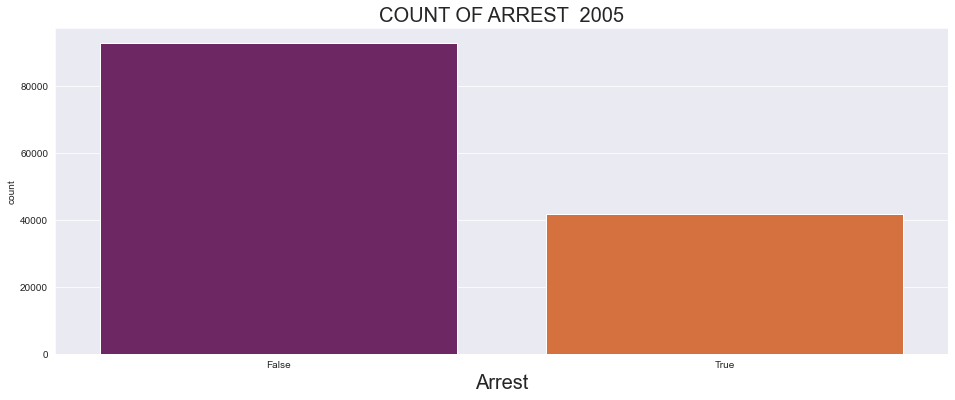

In [63]:
fig= plt.figure(figsize=(16,6))
total = int(len(newdata6))
ax = sns.countplot(data= newdata6, x='Arrest', palette='inferno')
plt.xlabel('Arrest', fontsize= 20)
plt.title('COUNT OF ARREST  2005', fontsize= 20)

plt.show()

**The above plot also shows a reduced crime rate in 2005, just like 2004 as against 2001. The arrest made was reduced as against 2001 & 2004. But in all crime was reducing in Chicago.**

# Final Analyis on 2001

In [64]:
distr4 = pd.crosstab(index=newdata2['Primary Type'], columns=newdata2['Arrest'])
distr4

Arrest                            False  True 
Primary Type                                  
ARSON                               243     50
ASSAULT                            7296   2115
BATTERY                           21888   6158
BURGLARY                           7326    486
CRIM SEXUAL ASSAULT                 400    127
CRIMINAL DAMAGE                   15436   1390
CRIMINAL SEXUAL ASSAULT               3      2
CRIMINAL TRESPASS                   884   3086
DECEPTIVE PRACTICE                 2933   1417
GAMBLING                              2    261
HOMICIDE                             70    124
INTERFERENCE WITH PUBLIC OFFICER     27    119
INTIMIDATION                         60     28
KIDNAPPING                          241     42
LIQUOR LAW VIOLATION                  0    466
MOTOR VEHICLE THEFT                7122   1053
NARCOTICS                             3  15174
OBSCENITY                             0     11
OFFENSE INVOLVING CHILDREN          463    265
OTHER NARCOTIC VIOLATION              0      1
OTHER OFFENSE                      7333   1559
PROSTITUTION                          0   1762
PUBLIC INDECENCY                      0      2
PUBLIC PEACE VIOLATION              542    288
RITUALISM                             3      0
ROBBERY                            4958    549
SEX OFFENSE                         381    250
STALKING                             48     16
THEFT                             25019   4665
WEAPONS VIOLATION                   221   1016

**The above distribution shows CRIME TYPE & ARREST made in 2001.**

**This is ploted below.**

Text(0.5, 0, ' CRIME TYPE & ARREST')

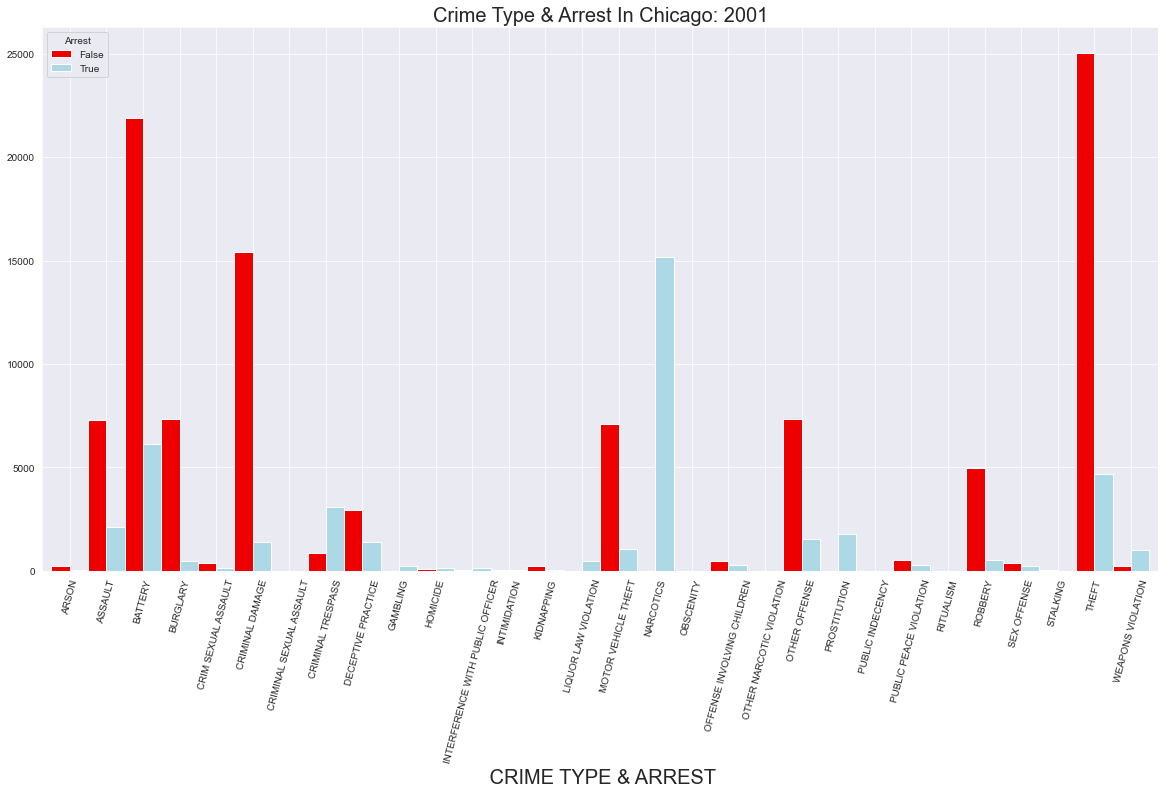

In [65]:
bp4 = distr4.plot.bar(figsize = (20,10), width= 1,rot= 75,  color=['#EE0000', '#ADD8E6'] )
plt.title('Crime Type & Arrest In Chicago: 2001', fontsize= 20)
plt.xlabel(' CRIME TYPE & ARREST', fontsize= 20) 

**The above plot shows us the arrest made & non arrest made in 2001.**

- **The year 2001 was the year that a rise in crime happened in Chicago, the plot showed that the CHICAGO PD were focused more on making arrest on crimes bothering around NARCOTICS, & PROSTITUTION, LIQUOR LAW VIOLATION.**


- **Looking at the arrest, we can see that there were little or no arrest as against the crimes commited.**


- **We can also say that these focus on these crimes made them miss the trends in the rise of other crimes like THEFT.**


- **FROM the rate of several crimes committed, we can say that the inability of the chicago PD to make more arrest on these crimes brought about the rise in crime for the year 2001 - 2004 as criminals feel they can walk away with crime so committed.**


- **This also answers our question on what the problem was when the Chicago PD plot showed the inability to make arrest was more than the ability to make arrest, because criminals feel they could walk away with crimes so committed, so they committed more.**


- **Increase in Crime rate at that period can be said to be associated with unemployment rate as the United States of America was in recession as at that time.**


- **The following comment as seen from an article: Thus far in 2002, payroll employment has been flat to down nationwide, and the unemployment rate has stayed stubbornly close to 6%, raising the specter of a “jobless recovery” from the 2001 recession.**
- **source: https://www.frbsf.org/economic-research/publications/economic-letter/2002/november/recent-trends-in-unemployment-duration/#:~:text=Thus%20far%20in%202002%2C%20payroll%20employment%20has%20been,of%20a%20%E2%80%9Cjobless%20recovery%E2%80%9D%20from%20the%202001%20recession.**



- **However, the reduced crime rate from 2004, 2005 was as a result of the crime techniques employed in Chicago from 2004.**

- **Source:https://www.google.com/url?q=https://www.chicagotribune.com/chi-0412190514dec19-story.html&sa=D&source=editors&ust=1661731853940536&usg=AOvVaw30A1E-kKbNRQC1oYKW-PEV**


- **_The question remains what did the Chicago PD do differently to keep crime at a reduced rate from 2020 - 2022?_**

**We will keep that abreast as we move on.**




# Creating a New Data frame to Analyze Crime From 2020 - 2022

In [66]:
newdata3 = data[data['Year'] >=2020 ]
newdata3

Unnamed: 0        ID Case Number                    Date month   day  \
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   Jul  Sun    
32               32  12037807    JD217598  04/26/2020 01:55:00 PM   Apr  Sun    
33               33  12592835    JF113360  01/15/2022 03:59:00 AM   Jan  Sat    
34               34  12252122    JD467371  12/19/2020 12:00:00 AM   Dec  Sat    
80               80  12021811    JD199802  04/01/2020 02:30:00 AM   Apr  Wed    
...             ...       ...         ...                     ...   ...   ...   
2278657     2278657  12423840    JE301898  07/15/2021 05:05:00 AM   Jul  Thu    
2278670     2278670  12529028    JE430658  11/01/2021 05:00:00 PM   Nov  Mon    
2278679     2278679  12430876    JE310408  07/22/2021 04:30:00 PM   Jul  Thu    
2278693     2278693  12770288    JF326569  07/21/2022 07:51:00 PM   Jul  Thu    
2278702     2278702  12137172    JD334150  08/16/2020 01:30:00 AM   Aug  Sun    

            period                                Block  IUCR  \
4          Morning                  016XX W HARRISON ST  051A   
32       Afternoon             053XX W BLOOMINGDALE AVE  0486   
33         Morning                  011XX S WESTERN AVE  1310   
34         Morning                  005XX W DIVISION ST  0890   
80         Morning                     034XX W 116TH PL  0610   
...            ...                                  ...   ...   
2278657    Morning                  064XX S NORMAL BLVD  0486   
2278670    Unknown                   016XX S HAMLIN AVE  0486   
2278679    Evening                009XX W FULLERTON AVE  0460   
2278693      Night                  030XX S ASHLAND AVE  0560   
2278702    Morning  028XX S DR MARTIN LUTHER KING JR DR  051A   

            Primary Type  ...  Ward Community Area  FBI Code  X Coordinate  \
4                ASSAULT  ... 27.00          28.00       04A    1165430.00   
32               BATTERY  ... 37.00          25.00       08B    1140326.00   
33       CRIMINAL DAMAGE  ... 28.00          28.00        14    1160554.00   
34                 THEFT  ... 27.00           8.00        06    1172284.00   
80              BURGLARY  ... 19.00          74.00        05    1155590.00   
...                  ...  ...   ...            ...       ...           ...   
2278657          BATTERY  ... 20.00          68.00       08B    1174056.00   
2278670          BATTERY  ... 24.00          29.00       08B    1151323.00   
2278679          BATTERY  ... 43.00           7.00       08B    1169577.00   
2278693          ASSAULT  ... 25.00          31.00       08A    1166157.00   
2278702          ASSAULT  ...  4.00          35.00       04A    1179375.00   

         Y Coordinate  Year              Updated On  Latitude Longitude  \
4          1897441.00  2021  07/18/2021 04:56:02 PM     41.87    -87.67   
32         1911447.00  2020  05/03/2020 03:47:20 PM     41.91    -87.76   
33         1894864.00  2022  01/22/2022 03:48:02 PM     41.87    -87.69   
34         1908265.00  2020  12/26/2020 03:51:09 PM     41.90    -87.64   
80         1827131.00  2020  04/08/2020 03:51:48 PM     41.68    -87.71   
...               ...   ...                     ...       ...       ...   
2278657    1862183.00  2021  07/22/2021 05:10:18 PM     41.78    -87.64   
2278670    1891513.00  2021  11/08/2021 03:51:57 PM     41.86    -87.72   
2278679    1916141.00  2021  07/29/2021 05:18:32 PM     41.93    -87.65   
2278693    1884604.00  2022  07/28/2022 04:49:21 PM     41.84    -87.67   
2278702    1886199.00  2020  08/23/2020 03:52:01 PM     41.84    -87.62   

                              Location  
4        (41.874173691, -87.668082118)  
32        (41.91310479, -87.759909733)  
33       (41.867204467, -87.686055895)  
34        (41.903726889, -87.64259764)  
80       (41.681436133, -87.706093087)  
...                                ...  
2278657  (41.777234782, -87.637460143)  
2278670  (41.858194929, -87.720032279)  
2278679  (41.925398449, -87.652311296)  
2278693

**When this ride started, we saw a trend in crime rate from 2001 through 2004 when crime was at its peak, & 2020 through 2022 when crime drop. Analysis was done to uncover insight as to why crime was at its peak above using the data frame (newdata2).**

**The above data frame was created to get insight into what caused a drop in crime from a period of 2020 - 2022.**

In [67]:
newdata3.groupby('Year')['Year'].count()

Year
2020    62587
2021    61045
2022    36751
Name: Year, dtype: int64

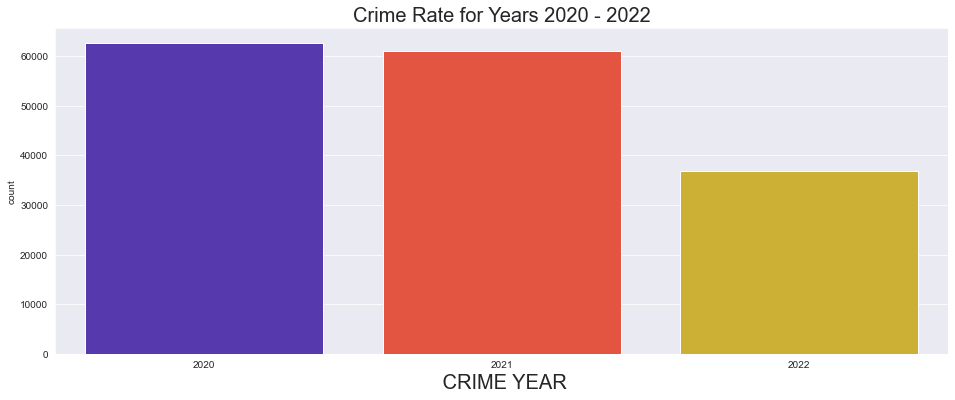

In [68]:
fig= plt.figure(figsize=(16,6))
sns.countplot(data= newdata3, x='Year', palette='CMRmap')
plt.title('Crime Rate for Years 2020 - 2022', fontsize= 20)
plt.xlabel(' CRIME YEAR', fontsize= 20) 
plt.show()

**From the above plot, crime rate in 2020 was about 62587, in 2022, it was 61045 & in 2022 it took a drop to about 36751.** 

- **We can say crime droped by almost half from 2020 - 2022.** 

- **_Could it be that the police made more arrest during these years?_**

- **Keeping this in mind while we move on.**

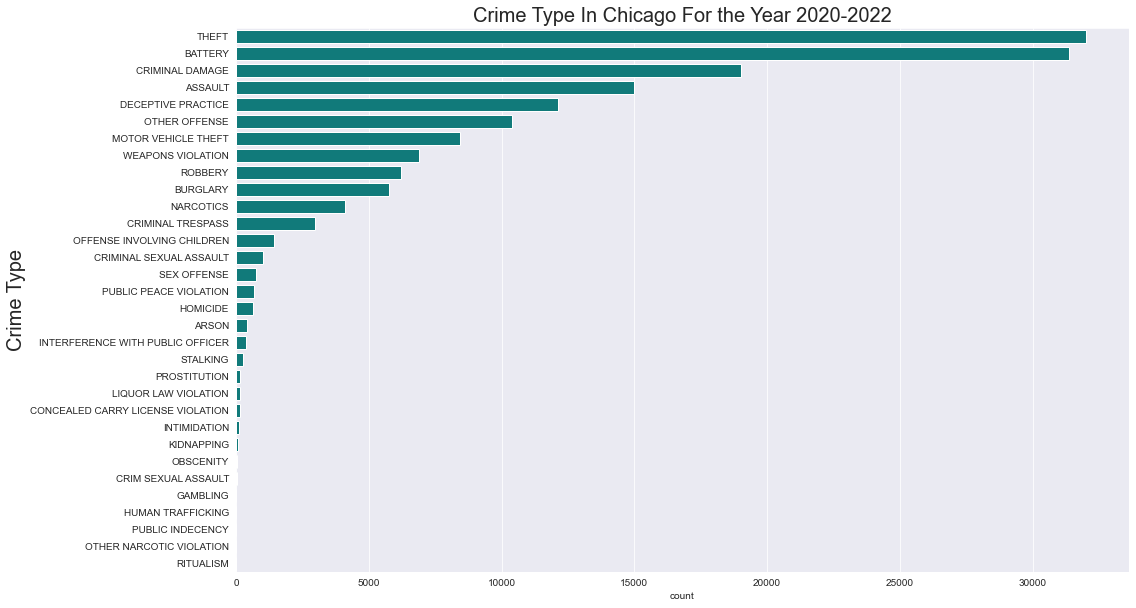

In [69]:
fig= plt.figure(figsize=(16,10))
large_to_small1 = newdata3.groupby('Primary Type').size().sort_values().index[::-1]
sns.countplot(data= newdata3, y='Primary Type',order=large_to_small1,  color='#008B8B')
plt.ylabel('Crime Type', fontsize= 20) 
plt.title('Crime Type In Chicago For the Year 2020-2022', fontsize= 20)
plt.show()

**The above plot shows the crime type from 2020 - 2022.**

- **Theft was also on the increase during this period.However, there was a new crime type which took the fourth highest crime in Chicago. This crime was Deceptive Practice**


- **It can be said that deceptive practice is on the a journey and the Chicago PD should pay attention to this crime type**

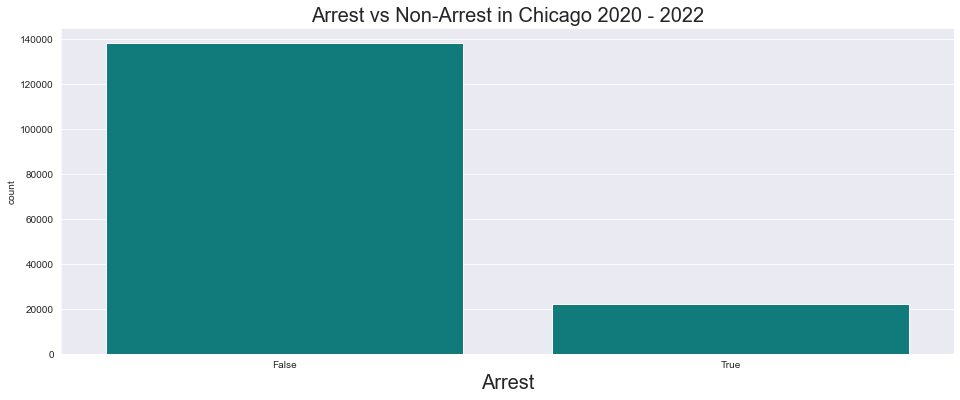

In [70]:
fig= plt.figure(figsize=(16,6))
total = int(len(data))
ax = sns.countplot(data= newdata3, x='Arrest',color='#008B8B')
plt.xlabel('Arrest', fontsize= 20)
plt.title('Arrest vs Non-Arrest in Chicago 2020 - 2022', fontsize= 20)

plt.show()

- **The plot shows that arrest not made from 2020 - 2022 was on the increase as against arrest made.**


- **Typically, anyone can get away with crime in Chicago, this is also not a determinant of the reduced crime rate from this period**

In [71]:
distr5 = pd.crosstab(index=newdata3['Primary Type'], columns=newdata3['Arrest'])
distr5

Arrest                             False  True 
Primary Type                                   
ARSON                                370     26
ASSAULT                            13436   1556
BATTERY                            26652   4718
BURGLARY                            5496    251
CONCEALED CARRY LICENSE VIOLATION      2    135
CRIM SEXUAL ASSAULT                   19      1
CRIMINAL DAMAGE                    18242    771
CRIMINAL SEXUAL ASSAULT              957     42
CRIMINAL TRESPASS                   1933   1024
DECEPTIVE PRACTICE                 11938    196
GAMBLING                               2     12
HOMICIDE                             418    201
HUMAN TRAFFICKING                     13      0
INTERFERENCE WITH PUBLIC OFFICER      43    322
INTIMIDATION                         103      1
KIDNAPPING                            62      4
LIQUOR LAW VIOLATION                   2    137
MOTOR VEHICLE THEFT                 8122    306
NARCOTICS                             77   4039
OBSCENITY                              9     18
OFFENSE INVOLVING CHILDREN          1292    126
OTHER NARCOTIC VIOLATION               1      2
OTHER OFFENSE                       9042   1341
PROSTITUTION                           2    141
PUBLIC INDECENCY                       0      4
PUBLIC PEACE VIOLATION               429    260
RITUALISM                              1      0
ROBBERY                             5822    376
SEX OFFENSE                          690     48
STALKING                             229     13
THEFT                              30406   1612
WEAPONS VIOLATION                   2503   4387

- **From the above distribution, Focus where arrest were made are on Weapon Violation & Narcotics, criminal Tresspass respectively.**

Text(0.5, 0, ' CRIME TYPE & ARREST')

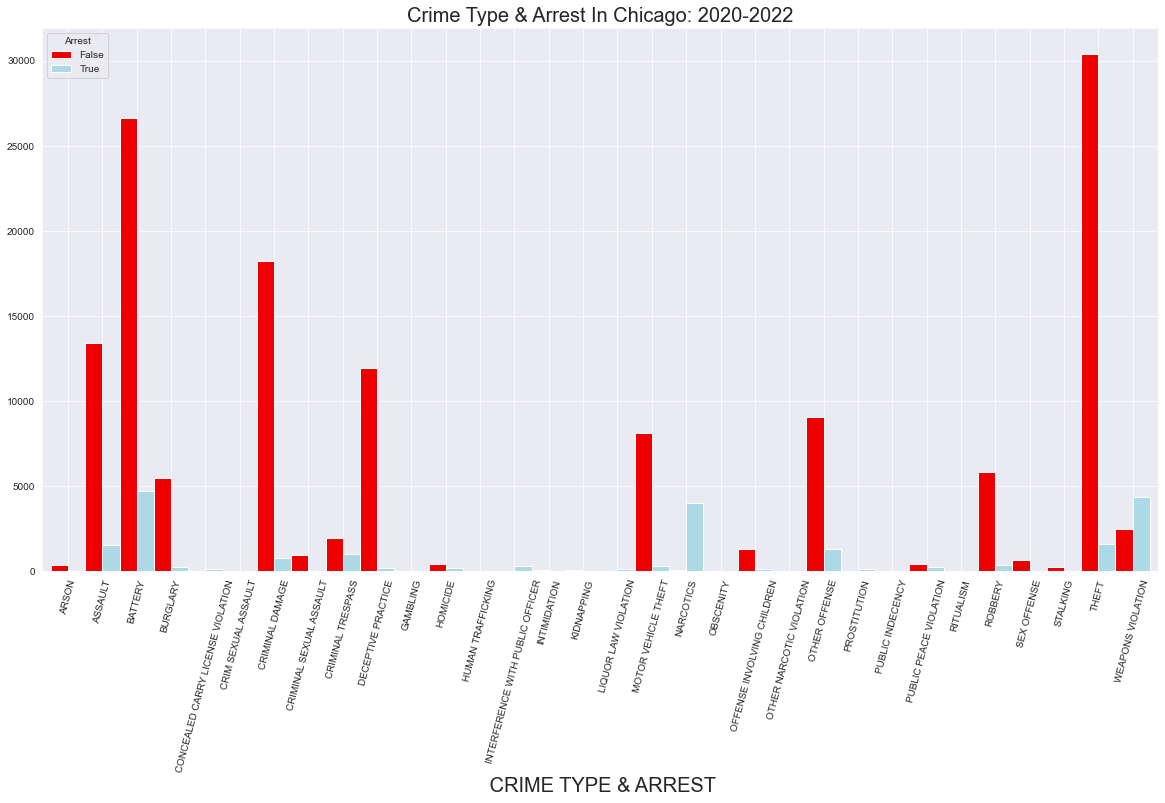

In [72]:
pt4 = distr5.plot.bar(figsize = (20,10), width= 1,rot= 75,  color=['#EE0000', '#ADD8E6'] )
plt.title('Crime Type & Arrest In Chicago: 2020-2022', fontsize= 20)
plt.xlabel(' CRIME TYPE & ARREST', fontsize= 20) 

- **From 2020 - 2022, several arrest were made, but Narcotics was focused more on & this saw the reduction in the position from 2001.**


- **Theft also remained the top Crime type as seen also in 2001.We can say the neglect in making more arrest on theft saw the rise in theft.**


- **If theft was given more focus like Narcotics, this could see a drop in Theft in Chicago.**

In [73]:
distr6 = pd.crosstab(index=newdata3['District'], columns=newdata3['Arrest'])
distr6

Arrest    False  True 
District              
1.00       6037   1078
2.00       6806    709
3.00       7376    901
4.00       8290   1113
5.00       6254   1112
6.00       9049   1636
7.00       6991   1349
8.00       8737   1070
9.00       6224    978
10.00      5895   1413
11.00      7615   2732
12.00      7461    765
14.00      4512    669
15.00      5186   1096
16.00      5127    759
17.00      4116    420
18.00      6541    889
19.00      6719    645
20.00      2799    284
22.00      4712    703
24.00      4738    514
25.00      7124   1232
31.00         4      3

**The above distribution shows arrest made by districts from 2020 - 2022.**

Text(0.5, 0, ' ARREST MADE BY DISTRICT')

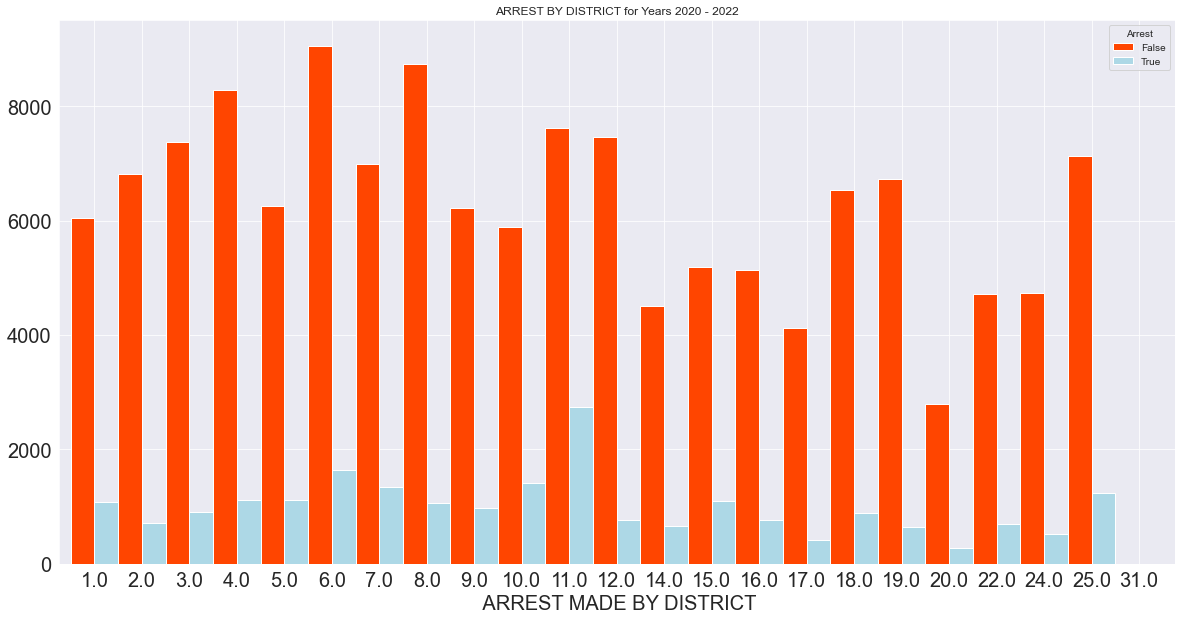

In [74]:

distr6.plot(kind= 'bar', stacked= False,title = 'ARREST BY DISTRICT for Years 2020 - 2022', fontsize= 20,
            figsize = (20,10), width= 1, rot= 0, color=['#FF4500', '#ADD8E6'])
plt.xlabel(' ARREST MADE BY DISTRICT', fontsize= 20) 

- **The above plot shows ARREST MADE BY DISTRICT FOR THE YEAR 2020 - 2022.**


- **From the above plot, little or no arrest were made in year 2020 - 2022.**


- **The plot also showed that anyone can get away with Crime in Chicago.**




- **The plot also showed that the Chicago PD arrest rate made little or no Impact on the reduced rate in crime from 2020 to 2022.**


- **From the crime rate plot for 2020 - 2022, crime rate was almost at the same level for year 2020 - 2021. However, it reduced by almost half in 2022.** 


- **We can say that the increased crime rate from 2020 -2021 was associated  with a fall in unemployment and this was also the period of COVID 19 happening around the world.**

- **There was also an increase tax levied on businesses during this period and this affected business and made many unemployed.**


- **Source: https://www.illinoispolicy.org/illinois-may-pay-bonuses-to-get-workers-to-take-jobs-again/**


- **The year 2022 was associated with decrease in unemployment rate in Chicago as this brought about the drop in crime rate for that year, as seen on the CRIME RATE FOR YEAR 2020 - 2022 plot.**

- **Source: https://ides.illinois.gov/newsroom/2022/may/unemployment-rates-down--jobs-up-in-nearly-all-metros-in-april.html**

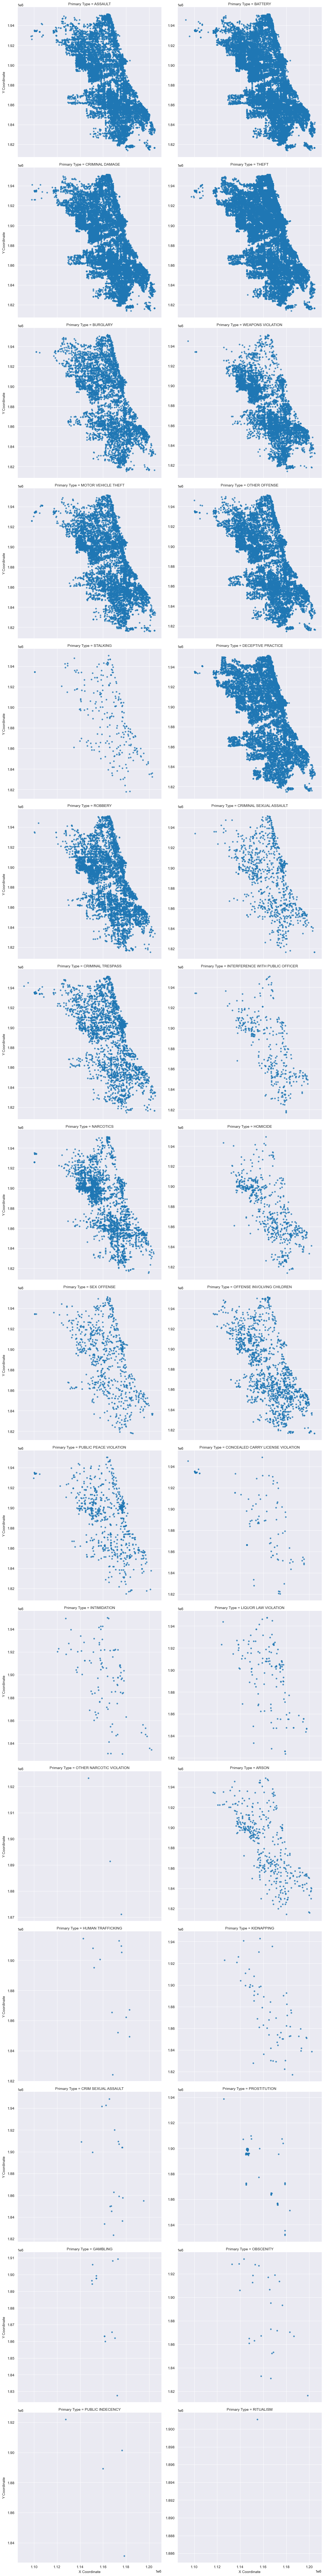

In [75]:
d = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=newdata3, 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

- **The above scatter plot showed that Crime rate was still happening across Chicago during the year 2020 - 2022 as seen in the year 2001.**


- **Hoever, there are some crimes like arson, prostitution, concealed License Violation and other type of crime from the scatter plot that are begining to spread around the districts in Chicago.**

In [76]:
distr7 = pd.crosstab(index=newdata3['District'], columns=newdata3['Primary Type']).T
distr7

District                           1.00   2.00   3.00   4.00   5.00   6.00   \
Primary Type                                                                  
ARSON                                 10      6     12     34     21     18   
ASSAULT                              511    805    927   1062    804   1204   
BATTERY                             1053   1508   1953   2079   1598   2350   
BURGLARY                             174    213    354    353    341    440   
CONCEALED CARRY LICENSE VIOLATION      3      2      1      7      5      6   
CRIM SEXUAL ASSAULT                    0      0      0      1      2      2   
CRIMINAL DAMAGE                      562    854   1122   1359   1055   1508   
CRIMINAL SEXUAL ASSAULT               65     43     59     58     33     48   
CRIMINAL TRESPASS                    235    117    122    157    119    178   
DECEPTIVE PRACTICE                   714    567    395    587    393    547   
GAMBLING                               0      0      0      0      1      0   
HOMICIDE                               5     22     45     44     50     67   
HUMAN TRAFFICKING                      0      1      1      0      1      2   
INTERFERENCE WITH PUBLIC OFFICER      14     17     13     28     28     34   
INTIMIDATION                           7      2      2      6      1      3   
KIDNAPPING                             2      4      3      6      3      7   
LIQUOR LAW VIOLATION                   8      4      3      8      3      5   
MOTOR VEHICLE THEFT                  434    487    444    488    371    561   
NARCOTICS                             79    112    105    132    124    180   
OBSCENITY                              1      2      0      1      0      2   
OFFENSE INVOLVING CHILDREN            21     80     84    114     89    107   
OTHER NARCOTIC VIOLATION               0      1      0      0      0      0   
OTHER OFFENSE                        319    579    586    675    569    690   
PROSTITUTION                           1      3      0      0      3      1   
PUBLIC INDECENCY                       1      0      0      0      1      0   
PUBLIC PEACE VIOLATION                64     41     30     23     19     37   
RITUALISM                              0      0      0      0      0      0   
ROBBERY                              285    344    309    339    216    374   
SEX OFFENSE                           35     30     26     40     30     35   
STALKING                               8     25     13     13      8     10   
THEFT                               2364   1373   1228   1312    926   1590   
WEAPONS VIOLATION                    140    273    440    477    552    679   

District                           7.00   8.00   9.00   10.00  ...  15.00  \
Primary Type                                                   ...          
ARSON                                 32     27     27     26  ...     28   
ASSAULT                              973    905    799    696  ...    654   
BATTERY                             2066   1860   1491   1779  ...   1582   
BURGLARY                             246    433    235    168  ...    171   
CONCEALED CARRY LICENSE VIOLATION      7     26      3     12  ...      0   
CRIM SEXUAL ASSAULT                    3      0      0      0  ...      0   
CRIMINAL DAMAGE                     1070   1275    966    939  ...    766   
CRIMINAL SEXUAL ASSAULT               51     46     42     41  ...     31   
CRIMINAL TRESPASS                     89    131     95    112  ...     81   
DECEPTIVE PRACTICE                   295    892    475    318  ...    303   
GAMBLING                               2      3      0      0  ...      0   
HOMICIDE                              53     27     39     44  ...     48   
HUMAN TRAFFICKING                      1      0      0      0  ...      0   
INTERFERENCE WITH PUBLIC OFFICER      28     10     18     17  ...     17   
INTIMIDATION                           1      6     10      5  ...      4   
KIDN

**The above distribution shows the rate of cime type per district.**

In [77]:
import json
chicago_state = json.load(open('chicago_police_districts.json', 'r'))

In [78]:
def toString(x):
    return str(int(x))

crime_years = newdata3.groupby(['District']).count().Arrest.reset_index()
crime_years['District'] = crime_years['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.json',
    name='choropleth',
    data=crime_years,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Crime Rate per Police District : 2020-2022',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

**The above map shows how the crimes varies across the different police districts from 2020 - 2022.**


- **Areas marked with dark red are associted with district 8, 11, 6, 4 and they are districts with very high crime rate.**

- **Areas marked with light red are also associated with high crime rate.**

- **Area on the map marked with light orange have crime rates but not as high as the other districts.**

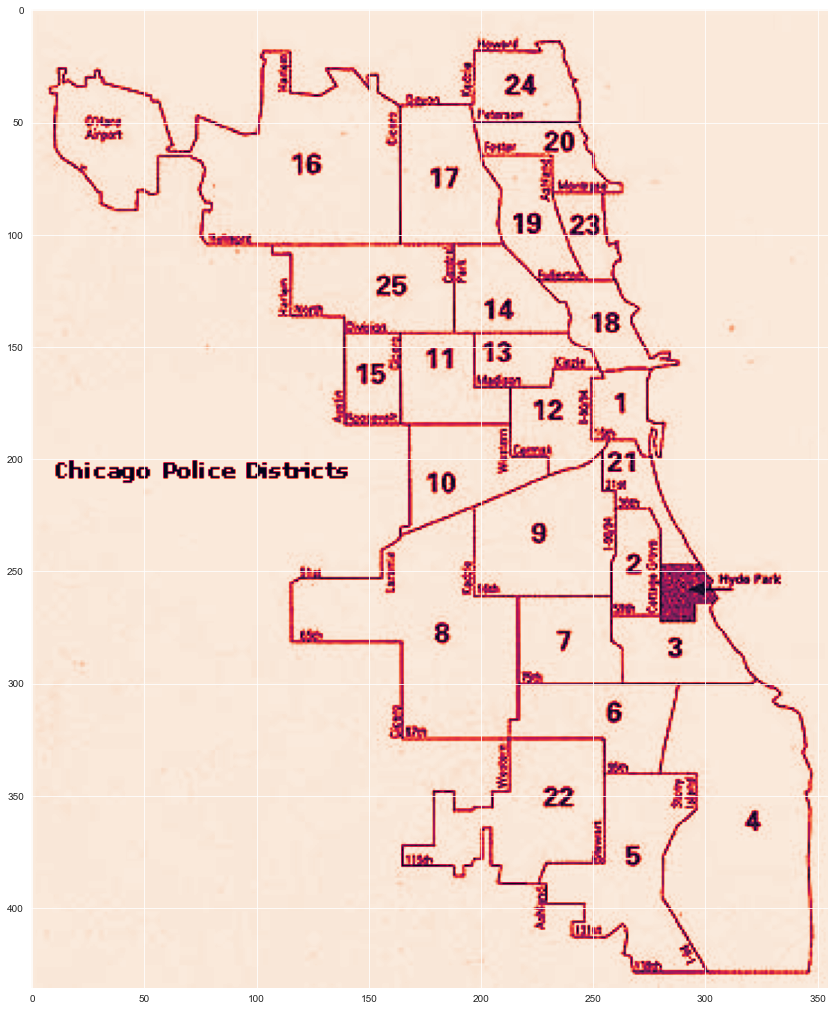

In [79]:
plt.figure(figsize=(15,18))
img = Image.open("map.gif")
plt.imshow(img)

**The above image help further explains the Choropleth map of Crimes across districts in Chicago.**

# Generating Insight with the Whole Dataset

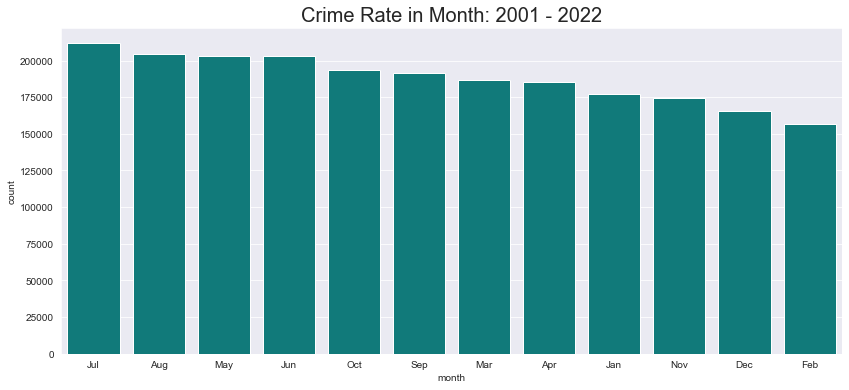

In [80]:
fig, ax = plt.subplots(figsize=(14,6))
large_to_smal = data.groupby('month').size().sort_values().index[::-1]
sns.countplot(data= data, x='month',order=large_to_smal,color='#008B8B')
#ax.set_xticklabels(months)
plt.title('Crime Rate in Month: 2001 - 2022', fontsize= 20)
plt.show()

**The above plot shows the month with the highest crime, this month is July.** 

- **July is associated with Summer, so we can say that during summer crime is highest in Chicago.**

- **This period is also the period where school children are let out from shool. During their time out of school we can say that they tend to get in to more trouble as they are termed idle and their age bracket is within 15-25. source:https://news.utexas.edu/2021/05/10/millennials-commit-less-crime-than-prior-generations/#:~:text=In%20general%2C%20birth%20cohort%2C%20age,researchers%20call%20the%20age%20effect.**

- **The month of July there are alot of activities and tourist in Chicago. This can also be attributed to the rise in crime.**


- **From the month of July, there was a slight drop in crime for the month of August. This can be attributed to a warm period in Chicago as people tend to not want to come out during these periods.**
**Source: https://www.chicagotribune.com/news/ct-xpm-2010-07-08-ct-wea-0709-asktom-20100708-story.html**


- **From the month of September, crime dropped and this can be attributed to a warmer weather than it was in August as this was the last period of hot weather.** 


- **There  was a drop in crime from September through Novemeber as this period were a bit pleasant as winter approaches. Source:https://www.currentresults.com/Weather/Illinois/Places/chicago-weather-in-september.php**


- **The month of december, crime reduced as this period was attributed to winter and very cold.** 

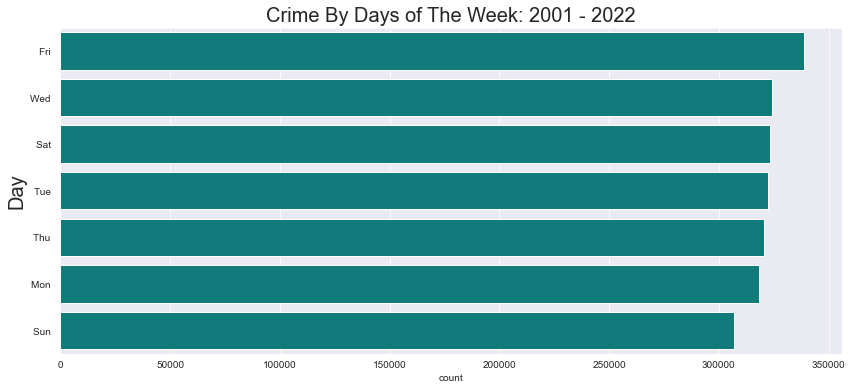

In [81]:
fig, ax = plt.subplots(figsize=(14,6))
smal = data.groupby('day').size().sort_values().index[::-1]
sns.countplot(data= data, y='day',order=smal, color='#008B8B')
plt.ylabel('Day', fontsize= 20)
plt.title('Crime By Days of The Week: 2001 - 2022', fontsize= 20)
plt.show()

- **From the above plot, it shows that crime can happen any day of the week in chicago, and these crimes happen more on friday as this is a period when Chicagoans are either receiving a pay check and they are set for the weekend.**

- **Crime on Sunday still happens but at a reduced rate.**

In [82]:
data.head(5)

Unnamed: 0        ID Case Number                    Date month   day  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   Jul  Sat    
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   Jul  Tue    
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   Apr  Fri    
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   Jul  Mon    
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   Jul  Sun    

      period                 Block  IUCR       Primary Type  ...  Ward  \
0  Afternoon  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE  ... 10.00   
1    Morning     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  ...  8.00   
2    Morning     062XX N TRIPP AVE  0610           BURGLARY  ... 39.00   
3    Morning    0000X N KEELER AVE  0560            ASSAULT  ... 28.00   
4    Morning   016XX W HARRISON ST  051A            ASSAULT  ... 27.00   

  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0          46.00        14    1196638.00    1848800.00  2008   
1          47.00        15    1184499.00    1843935.00  2018   
2          12.00        05    1146911.00    1941022.00  2007   
3          26.00       08A    1148388.00    1899882.00  2018   
4          28.00       04A    1165430.00    1897441.00  2021   

               Updated On  Latitude Longitude                       Location  
0  02/28/2018 03:56:25 PM     41.74    -87.56  (41.739979622, -87.555120042)  
1  08/07/2018 04:02:59 PM     41.73    -87.60  (41.726922145, -87.599746995)  
2  02/28/2018 03:56:25 PM     41.99    -87.73  (41.994137622, -87.734959049)  
3  07/30/2018 03:52:24 PM     41.88    -87.73  (41.881217483, -87.730589961)  
4  07/18/2021 04:56:02 PM     41.87    -87.67  (41.874173691, -87.668082118)  

[5 rows x 26 columns]

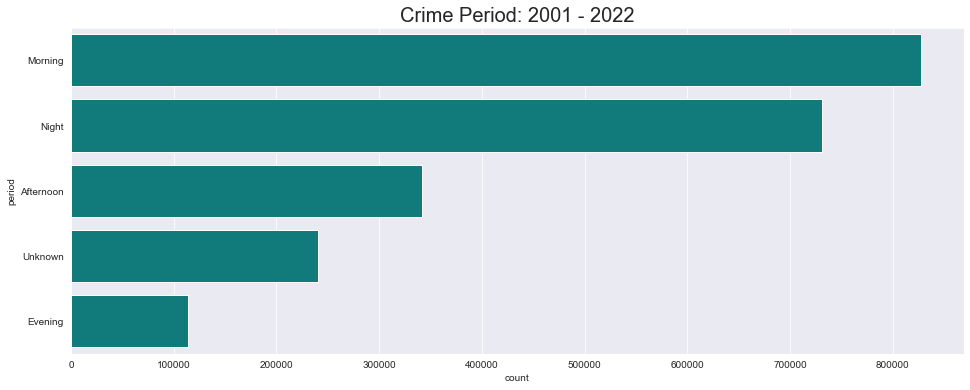

In [83]:
fig, ax = plt.subplots(figsize=(16,6))
smal1 = data.groupby('period').size().sort_values().index[::-1]
sns.countplot(data= data, y='period',order=smal1, color='#008B8B')
#ax.set_xticklabels(Day)
plt.title('Crime Period: 2001 - 2022', fontsize= 20)
plt.show()

- **The above plot shows the period when Crime happens in Chicago.**


- **Crime happens more during the morning period. This can be attributed to the fact that crime happen mostly during the dark hours and this can account for the second rise in crime which is the Night period.**


- **It can also be said from the above plot that Crime also happen at night because Chicago is a very busy place.**


- **Crime also happen during the Afternoon period more than it happens in the evening.** 


- **The unknown from the plot can be said to be a period that wasn't defined from the Chicago PD data base & it shows that all theft has a said period.**

In [84]:
data

Unnamed: 0        ID Case Number                    Date month   day  \
0                 0   6407111    HP485721  07/26/2008 02:30:00 PM   Jul  Sat    
1                 1  11398199    JB372830  07/31/2018 10:57:00 AM   Jul  Tue    
2                 2   5488785    HN308568  04/27/2007 10:30:00 AM   Apr  Fri    
3                 3  11389116    JB361368  07/23/2018 08:55:00 AM   Jul  Mon    
4                 4  12420431    JE297624  07/11/2021 06:40:00 AM   Jul  Sun    
...             ...       ...         ...                     ...   ...   ...   
2278721     2278721  10716043    HZ474139  10/14/2016 02:35:00 PM   Oct  Fri    
2278722     2278722   1740109     G546340  09/11/2001 10:20:00 PM   Sep  Tue    
2278723     2278723   4737434    HM342705  05/10/2006 07:49:00 PM   May  Wed    
2278724     2278724  11122832    JA476827  10/18/2017 10:30:00 PM   Oct  Wed    
2278725     2278725   3409804    HK420105  06/09/2004 08:19:28 PM   Jun  Wed    

            period                 Block  IUCR       Primary Type  ...  Ward  \
0        Afternoon  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE  ... 10.00   
1          Morning     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  ...  8.00   
2          Morning     062XX N TRIPP AVE  0610           BURGLARY  ... 39.00   
3          Morning    0000X N KEELER AVE  0560            ASSAULT  ... 28.00   
4          Morning   016XX W HARRISON ST  051A            ASSAULT  ... 27.00   
...            ...                   ...   ...                ...  ...   ...   
2278721  Afternoon      006XX N CLARK ST  0560            ASSAULT  ... 42.00   
2278722      Night       052XX W LAKE ST  0460            BATTERY  ... 22.72   
2278723      Night  007XX E OAKWOOD BLVD  0560            ASSAULT  ...  4.00   
2278724      Night       002XX W ERIE ST  1360  CRIMINAL TRESPASS  ... 42.00   
2278725      Night   016XX N ROCKWELL ST  1811          NARCOTICS  ...  1.00   

        Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0                46.00        14    1196638.00    1848800.00  2008   
1                47.00        15    1184499.00    1843935.00  2018   
2                12.00        05    1146911.00    1941022.00  2007   
3                26.00       08A    1148388.00    1899882.00  2018   
4                28.00       04A    1165430.00    1897441.00  2021   
...                ...       ...           ...           ...   ...   
2278721           8.00       08A    1175423.00    1904617.00  2016   
2278722          37.54       08B    1141137.00    1902008.00  2001   
2278723          38.00       08A    1181989.00    1878827.00  2006   
2278724           8.00        26    1174469.00    1904732.00  2017   
2278725          24.00        18    1158782.00    1910845.00  2004   

                     Updated On  Latitude Longitude  \
0        02/28/2018 03:56:25 PM     41.74    -87.56   
1        08/07/2018 04:02:59 PM     41.73    -87.60   
2        02/28/2018 03:56:25 PM     41.99    -87.73   
3        07/30/2018 03:52:24 PM     41.88    -87.73   
4        07/18/2021 04:56:02 PM     41.87    -87.67   
...                         ...       ...       ...   
2278721  02/10/2018 03:50:01 PM     41.89    -87.63   
2278722  08/17/2015 03:03:40 PM     41.89    -87.76   
2278723  02/28/2018 03:56:25 PM     41.82    -87.61   
2278724  02/10/2018 03:50:01 PM     41.89    -87.63   
2278725  02/28/2018 03:56:25 PM     41.91    -87.69   

                              Location  
0        (41.739979622, -87.555120042)  
1        (41.726922145, -87.599746995)  
2        (41.994137622, -87.734959049)  
3        (41.881217483, -87.730589961)  
4        (41.874173691, -87.668082118)  
...                                ...  
2278721  (41.893646656, -87.631177143)  
2278722  (41.887188151, -87.757163155)  
2278723   (41.82272748, -87.607863136)  
2278724  (41.893983593, -87.634677382)  
2278725   (41.91109424, -87.692122762)  

[2254701 rows x 26 columns]

In [85]:
dt =data.groupby('Block')['Block'].count().sort_values(ascending= False)
dt.head(20)

Block
100XX W OHARE ST                       4785
001XX N STATE ST                       4343
076XX S CICERO AVE                     2999
008XX N MICHIGAN AVE                   2790
0000X N STATE ST                       2567
0000X W TERMINAL ST                    1780
064XX S DR MARTIN LUTHER KING JR DR    1681
063XX S DR MARTIN LUTHER KING JR DR    1635
023XX S STATE ST                       1532
001XX W 87TH ST                        1341
008XX N STATE ST                       1319
012XX S WABASH AVE                     1297
022XX S STATE ST                       1275
0000X S STATE ST                       1270
006XX N MICHIGAN AVE                   1262
057XX S CICERO AVE                     1216
009XX W BELMONT AVE                    1175
075XX S STONY ISLAND AVE               1133
071XX S JEFFERY BLVD                   1132
038XX W ROOSEVELT RD                   1090
Name: Block, dtype: int64

Text(0.5, 1.0, 'Top 20 Dangerous Blocks In Chicago: 2001 - 2022')

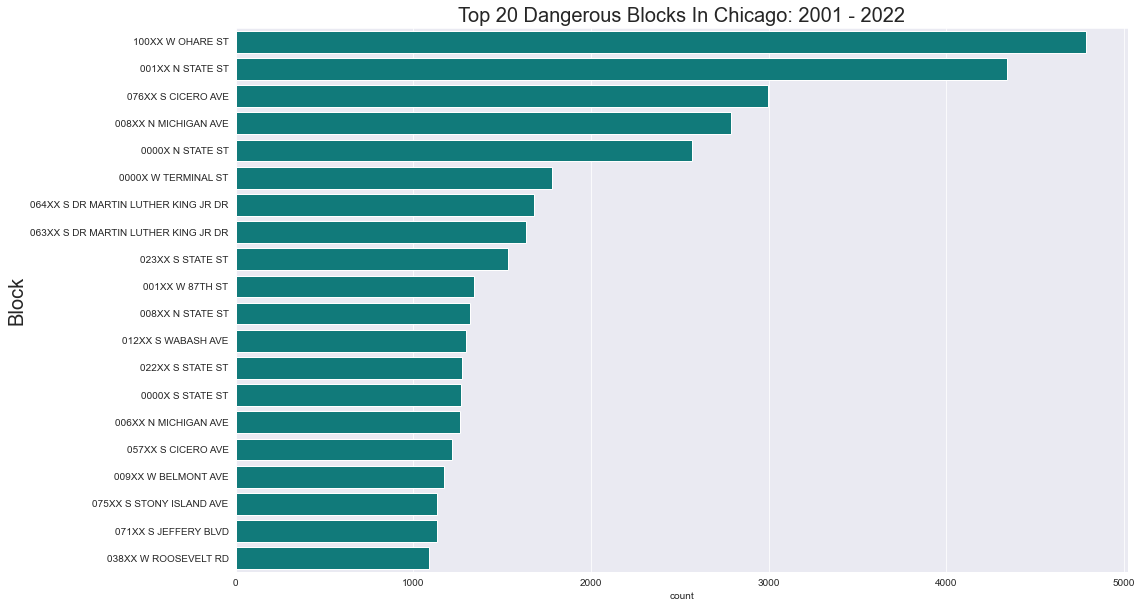

In [86]:
fig= plt.figure(figsize=(16,10))
sns.countplot(y ='Block', data= data, color='#008B8B',
             order=data['Block'].value_counts().iloc[:20].index)
plt.ylabel('Block', fontsize= 20)
plt.title('Top 20 Dangerous Blocks In Chicago: 2001 - 2022', fontsize= 20)

**The above plot shows the top 20 most dangerous places in Chicago.**


**_W OHARE ST chicago_ is the most dangerous place in Chicago, this can be attributed to it being the transport hub of Chicago, the fourth busiest airport on Earth.**

**Source:https://chicagodetours.com/history-of-chicago-transportation-as-a-world-hub/**

In [87]:
sorted_data= data.groupby('Community Area')['Community Area'].count().sort_values(ascending = False).head(20)

sorted_data

Community Area
37.54    181546
25.00    130419
8.00      72450
43.00     68799
23.00     65239
28.00     61936
24.00     60817
29.00     60402
67.00     59949
71.00     58911
49.00     55135
68.00     54601
69.00     51349
66.00     50877
32.00     50465
44.00     45593
22.00     43102
61.00     41935
6.00      41395
26.00     39173
Name: Community Area, dtype: int64

Text(0.5, 1.0, 'Top 20 Community Area of Crimes In Chicago: 2001 - 2022')

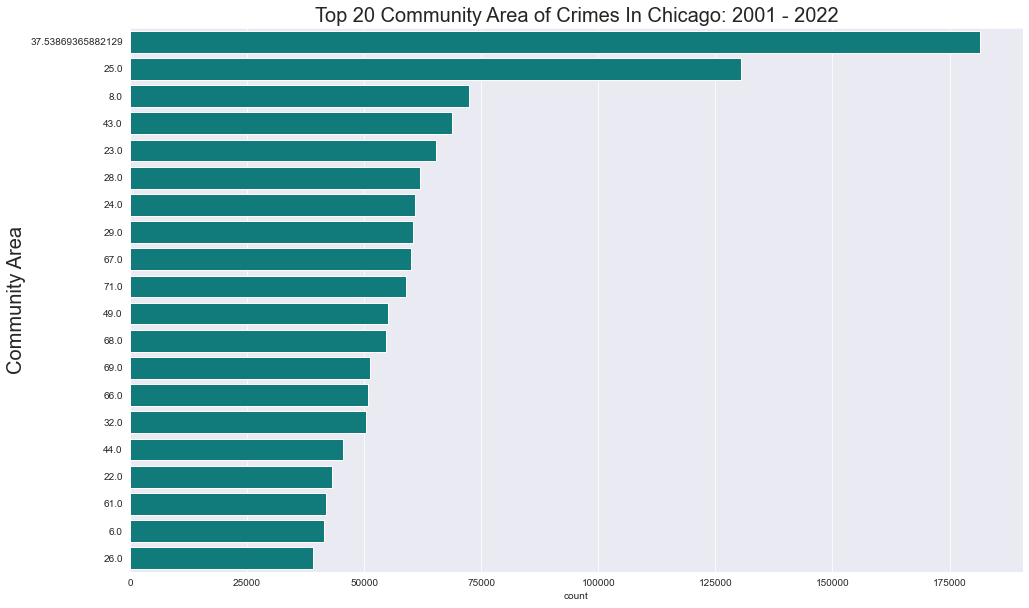

In [88]:
fig= plt.figure(figsize=(16,10))
sns.countplot(y ='Community Area', data= data, color='#008B8B',
             order=data['Community Area'].value_counts().iloc[:20].index)
plt.ylabel('Community Area', fontsize= 20)
plt.title('Top 20 Community Area of Crimes In Chicago: 2001 - 2022', fontsize= 20)

   **The above plot shows the top 20 dangerous community area in Chicago.**

- **Area 37.5 is the highest community area with the most crime and termed the most dangerous area.**

- **Area 25.0 comes next as the second most dangerous area in Chicago.**

In [89]:
arrest_all_year = data[data['Year']>=2001].groupby(['District']).count().Arrest.reset_index()
arrest_all_year['District'] = arrest_all_year['District'].apply(toString)

arrest = data[data['Year']>=2001].dropna()#

# _____________________________________________

lats = list(arrest.Latitude)#We need this cause apparently, folium can recognize not a geoseries
longs = list(arrest.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.json',
    name='choropleth',
    data=arrest_all_year,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Crime Type By Location : 2001-2022',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map7.html") 
IFrame('map7.html', width=990, height=700)

**The Map above shows the geo location of crime around Chicago. From the above map, you can hover around it to see crime spread when you click on any point on the map. The above map can help Chicagoans see locations where crimes are more from other location, decide on the best route to choose for their safety, and the whole community at large.**


**The map also can aide Tourist who visit Chicago to have a safe visit by helping tourist avoid the areas that are most responsible for the high crime rate.**

In [90]:
data.groupby( 'FBI Code')['Primary Type'].count()

FBI Code
01A      3572
01B        25
02      10646
03      85272
04A     39558
04B     62395
05     124679
06     473434
07     104917
08A    112469
08B    355156
09       3831
10      12077
11      81211
12        390
13        817
14     258646
15      30377
16      20579
17      10604
18     206627
19       4396
20       8752
22       4420
24      16778
26     223073
Name: Primary Type, dtype: int64

**A grouping of the FBI Classification code and crime type by count.**

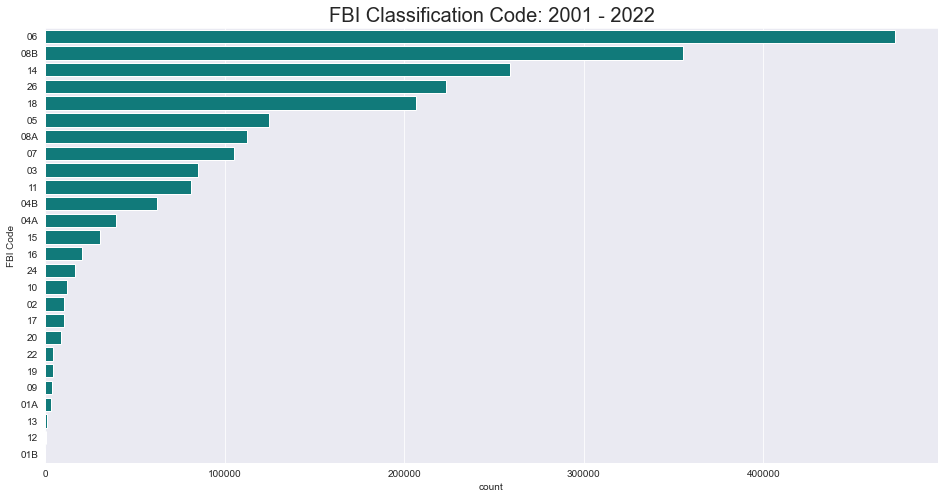

In [91]:
fig, ax = plt.subplots(figsize=(16,8))
smal_1 = data.groupby('FBI Code').size().sort_values().index[::-1]
sns.countplot(data= data, y='FBI Code',order=smal_1, color='#008B8B')
#ax.set_xticklabels(Day)
plt.title('FBI Classification Code: 2001 - 2022', fontsize = 20)
plt.show()

**The above plot shows FBI Code for crime clasification.**

**The top five ranked codes are classified as;**

- **The FBI code 06 ranks the highest in the classification code which describes Larceny.**

- **08B ranks second on the code classification which describe Simple Battery.**

- **14 ranks next and this describes Vandalism as seen on the FBI Classification code.**

- **Code 26 accounts for Misc Non-Index Offense, (Crime Against Society).**

- **The FBI code 18 is classified as DRUG ABUSE.**

**There are other crimes still on the rise, my focus was on the five classification code.**


**Source:https://gis.chicagopolice.org/pages/crime_details**

In [92]:
Type_heat = data[['Primary Type', 'Community Area']]

#Filter by community Areas
Type_heat.index = Type_heat['Community Area']
del Type_heat['Community Area']
Type_heat = Type_heat[Type_heat.index.get_level_values('Community Area').isin([25.00, 8.00, 43.00, 23.00,
                                                                                    28.00, 24.00, 29.00, 67.00,
                                                                                    71.00])]
Type_heat =Type_heat.reset_index() 

#Filter by Primary_Type
Type_heat.index = Type_heat['Primary Type']
del Type_heat['Primary Type']
Type_heat = Type_heat[Type_heat.index.get_level_values('Primary Type').isin(['THEFT','BATTERY','CRIMINAL DAMAGE',
                                                        'NARCOTICS','ASSAULT','ASSAULT','OTHER OFFENSE'
                                                        'BURGLARY','MOTOR VEHICLE THEFT','ROBBERY',
                                                        'DECEPTIVE PRACTICE','CRIMINAL TRESPASS'])]
Type_heat = Type_heat.reset_index() 


Type_heat = pd.DataFrame (Type_heat.groupby(['Primary Type','Community Area']).size())
Type_heat.columns = [' ']

Type_heat.head()

Primary Type Community Area      
ASSAULT      8.00            2882
             23.00           4287
             24.00           3015
             25.00           8385
             28.00           3610

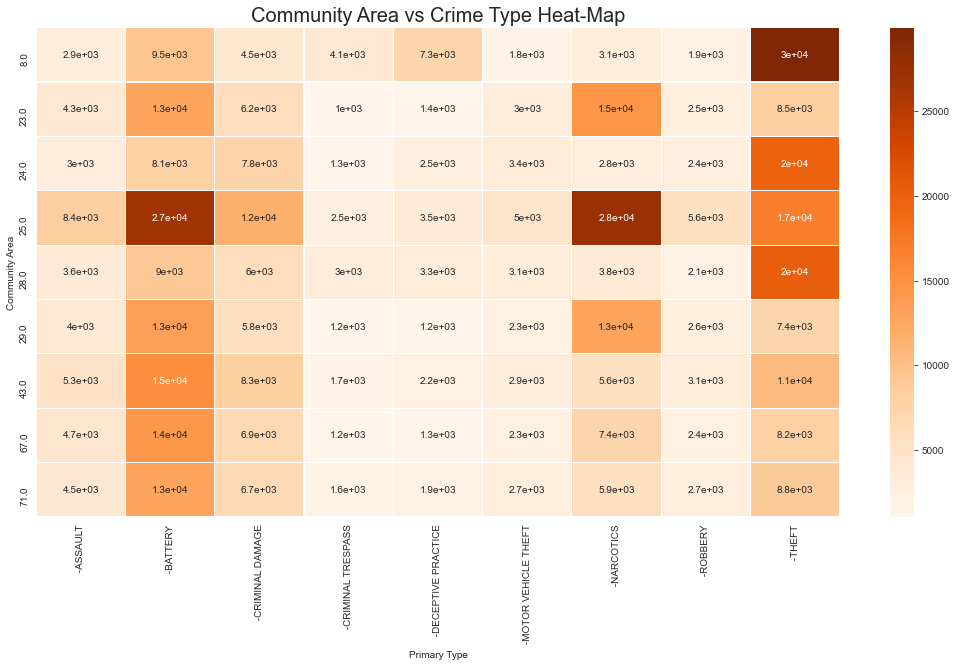

In [93]:
heat_mp = sns.heatmap(Type_heat.unstack(level=0), linewidths=.2, cmap='Oranges', annot=True)

plt.ylabel('Community Area')
plt.xlabel('Primary Type')
plt.title('Community Area vs Crime Type Heat-Map', fontsize= 20)

fig = plt.gcf()
fig.set_size_inches(18,9)

- **Using the top nine community area & primary crime type, Crime happens in all Community Area in Chicago.**


- **Area 25 has the most activities with crime.**


- **Battery, Theft is common with all the areas on the heatmap. However, theft has a strong hold in area 8.0, Battery &         Narcotics also have a strong hold in area 25.0.**


- **Area 24.0 & 28.0 theft is high, but not as high as it is in area 8.0.**

# Conclusion

**Using the above data set, a lot of insight can be gotten from it based on what the intent to analyze is. 
However, everything that has a beginning has an end.**


**In conclusion, the following findings were derived:**


- **Crime was at its peak in Chicago from a period of 2001 through 2004. This is due to the period of recession faced by the United States Economy.**


- **From the year 2004 through 2022, crime reduced gradually. This was as a result of the crime techniques employed in Chicago after 2004.**


- **The major crime type in Chicago is theft.**


- **The non arrest rate in Chicago is high compared to the arrest rate. This means anyone can commit crime in Chicago and get away with it.**


- **The street in Chicago is where most of the crimes in Chicago happen.**


- **Chicago has 23 Districts. The arrest made across districts is relatively low; only district 11 came close to making more arrests.**


- **Theft as the only crime type showed little or no arrest on crimes around theft, this brought about the trend in theft, Theft happens every day of the week but more on friday.**


- **Summer is a time when crime is high in Chicago.**


- **Temperature is a determinant of crime in Chicago, the warmer the temperature the higher the crime. The colder it gets the reduced rate of crime.**


- **Unemployment is a big determinant of crime in the city of Chicago. This can be seen from the high rate in crime during the period of 2001 through 2004 and the reduced rate in crime from 2020 through 2022 which is still not yet over.**


- **Crime happen during the morning periods in Chicago.**


- **Crime spread around Chicago today has been like that from 2001 and this is still the case in 2022.**


- **There is increased crime rates across districts. However, districts 4, 6, 8, 11 are very high with crimes.**


- **W OHARE ST is the most dangerous place in Chicago.**


- **Community Area 37.5 is the most dangerous community area in Chicago.**


- **Larceny according to the FBI Classification code is the highest crime type classification.**


- **Theft & Battery is high amongst all Community Areas in Chicago.**



# Advice to the Chicago PD

**The Chicago PD has done a good job in providing this data set. My advice to the Chicago PD can be seen in the bulleted point below;**

- **The Chicago PD should make more arrests as this sends a message to criminals that whatever crime so committed in Chicago can not be written off book.**


- **The Chicago PD should pay attention to crimes that are on the rise like arson, prostitution, concealed License Violation, Kidnapping e.t.c as these crimes could sky rocket like theft.**


- **They should pay attention to periods like summer or any period that is warm in Chicago, as these are periods with relatively high crime rates.**


- **Deployment of resources across the most dangerous places in Chicago as their presence in those areas would defeat the intent to commit crime.**


- **Focus on School children as the average age of committing crime is around 17 - 30. Since the majority of these age groups are school children, and they are let out during summer, this accounts for the fact that they get themselves into trouble.**


- **Deployment of more hands on the street as the street is the location with a high rate of crime happenings.**


- **Finally, the Chicago PD should focus more on periods around mornings and nights as most of the crimes take place during these periods. They should also be alert during other periods as these criminals are unpredictable.**


# Recommendation

- **This dataset is very rich with insight. However, I could not finish the insight as i focused on analyzing some aspect of the data that was relevant to my findings. I further recommend that insight can be gotten from the data by analyzing individaul crime types by year to see how crime has evolved by crime time.** 